In [ ]:
import os
from pathlib import Path

# Change to project root by walking up until a marker is found
markers = {'.git', 'pyproject.toml', 'requirements.txt', 'data'}
root = Path.cwd()
while root != root.parent and not any((root / m).exists() for m in markers):
    root = root.parent

os.chdir(root)

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
country_aggregated_df2 = pd.read_csv("data/country_aggregated_df2.csv")

#### Country and Regional Level Temporal Trends Analysis, stratified by age group and sex

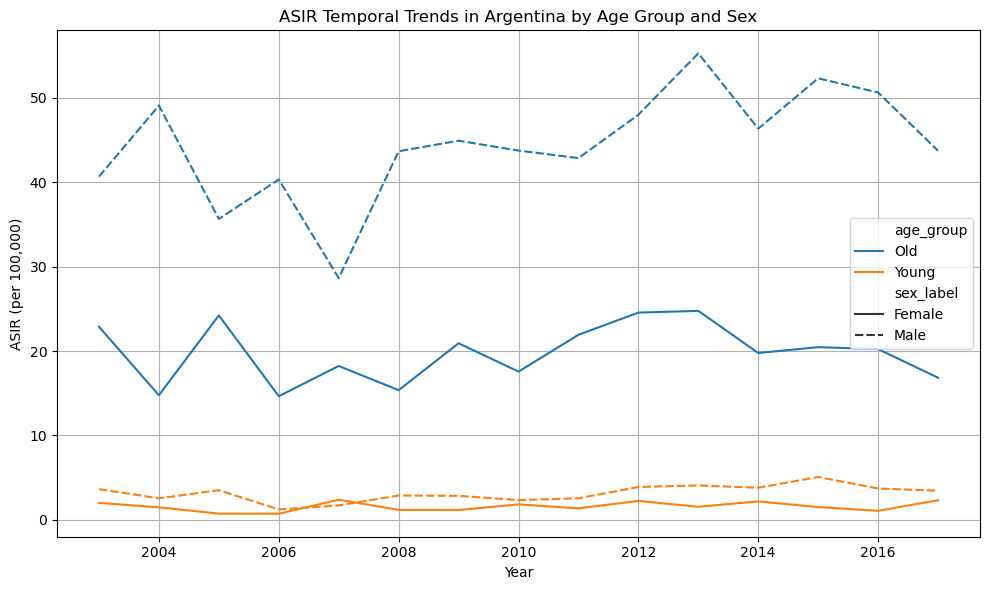

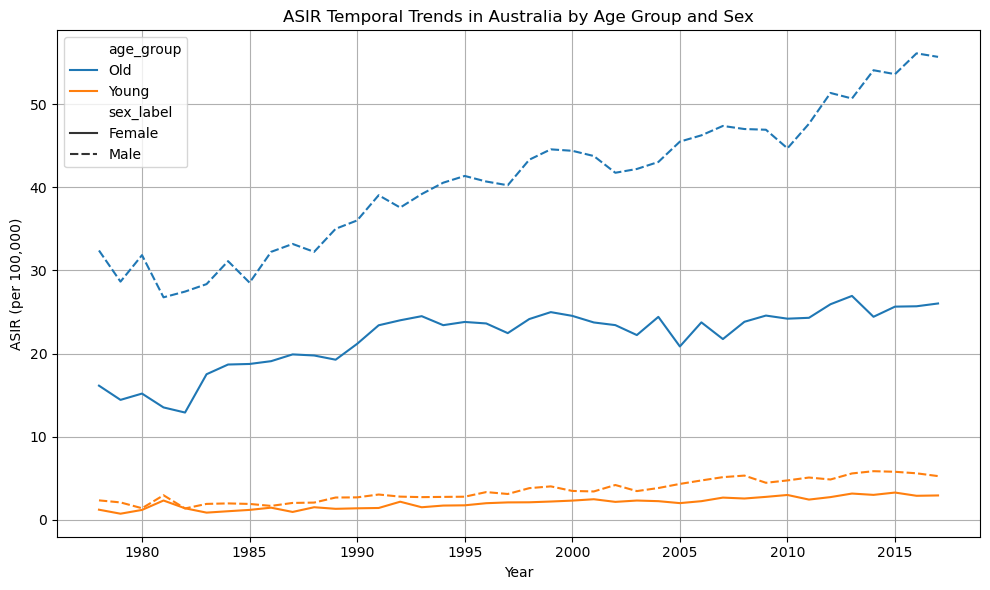

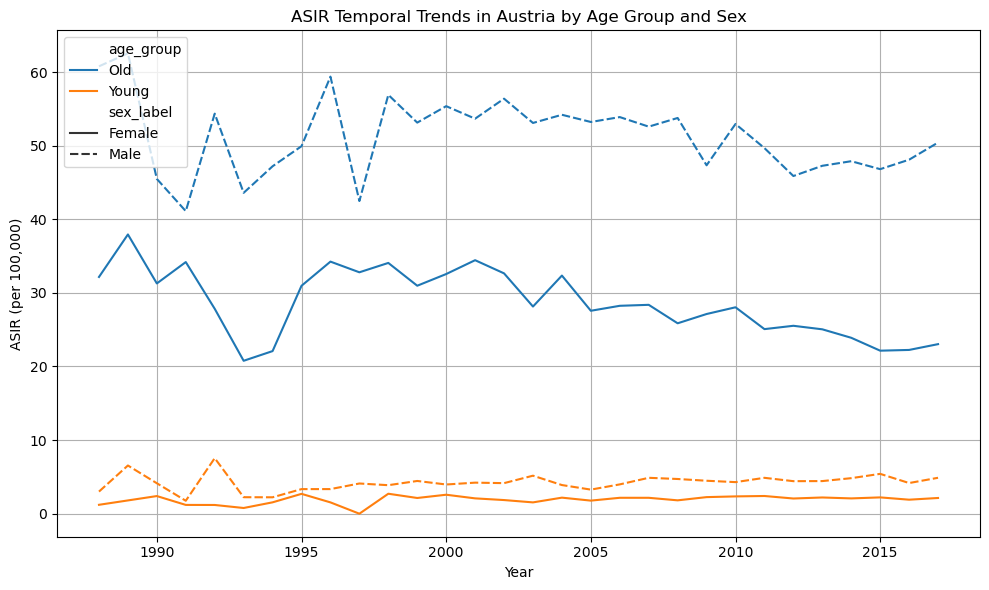

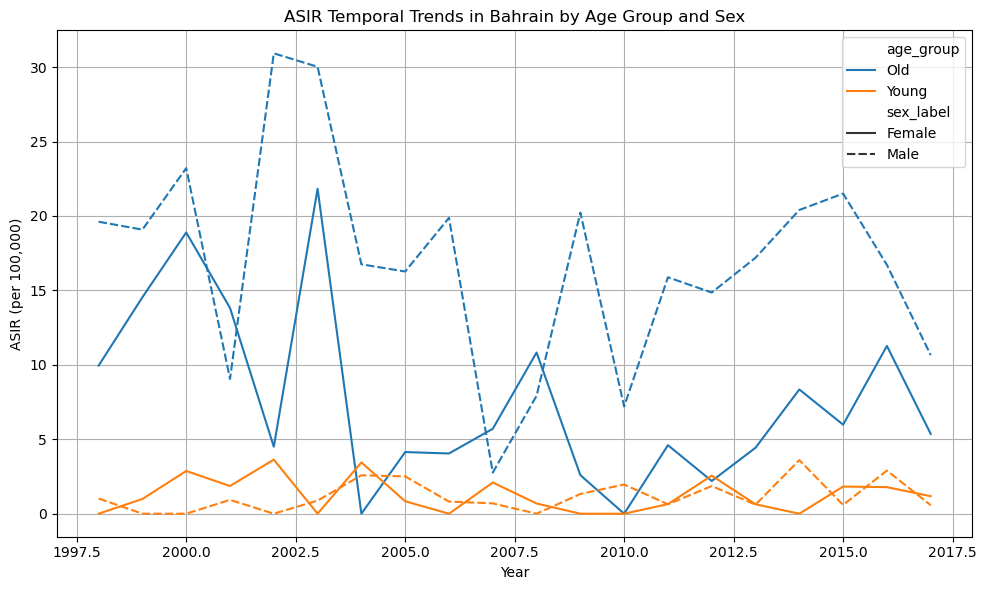

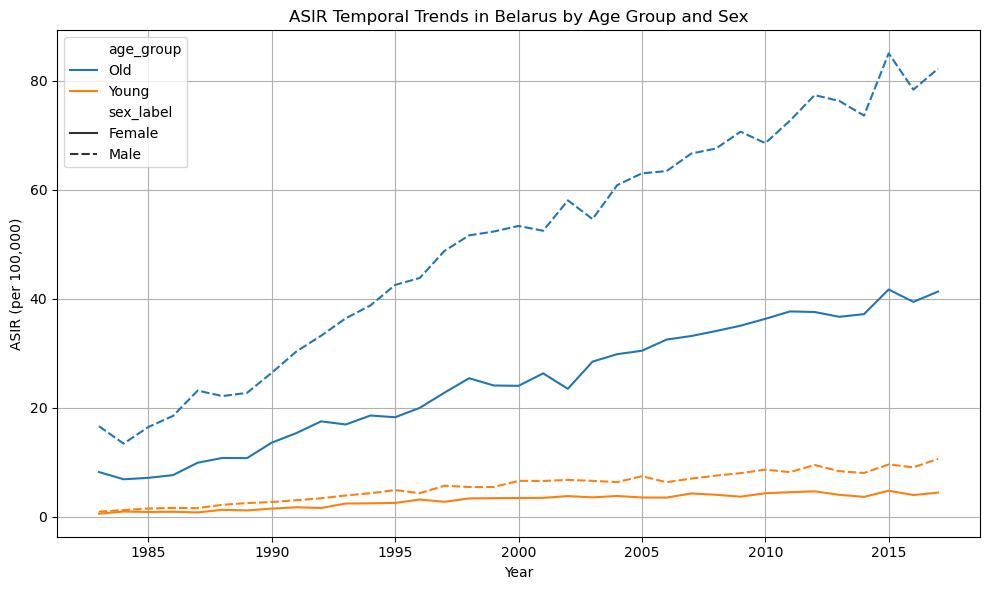

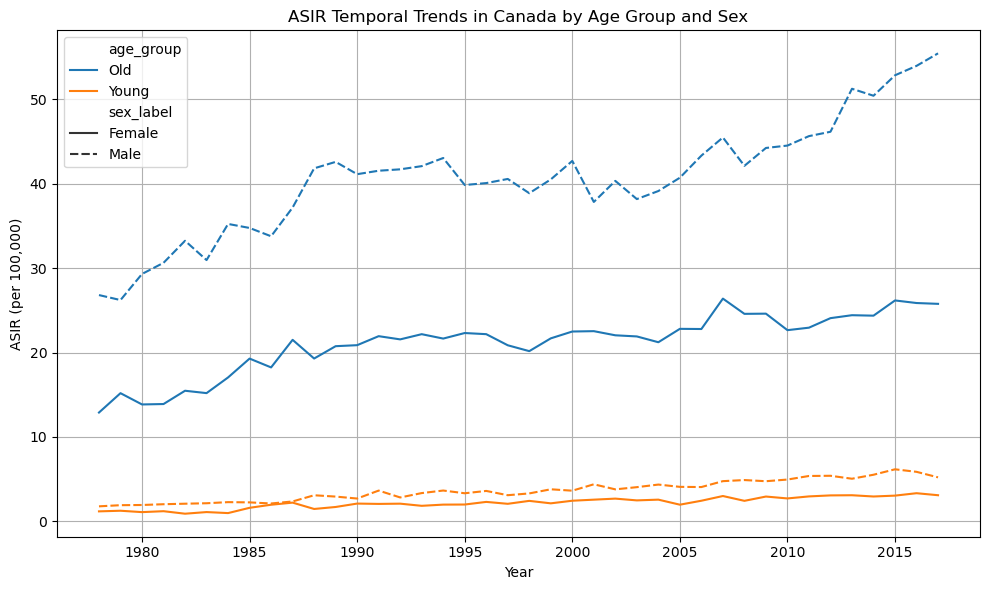

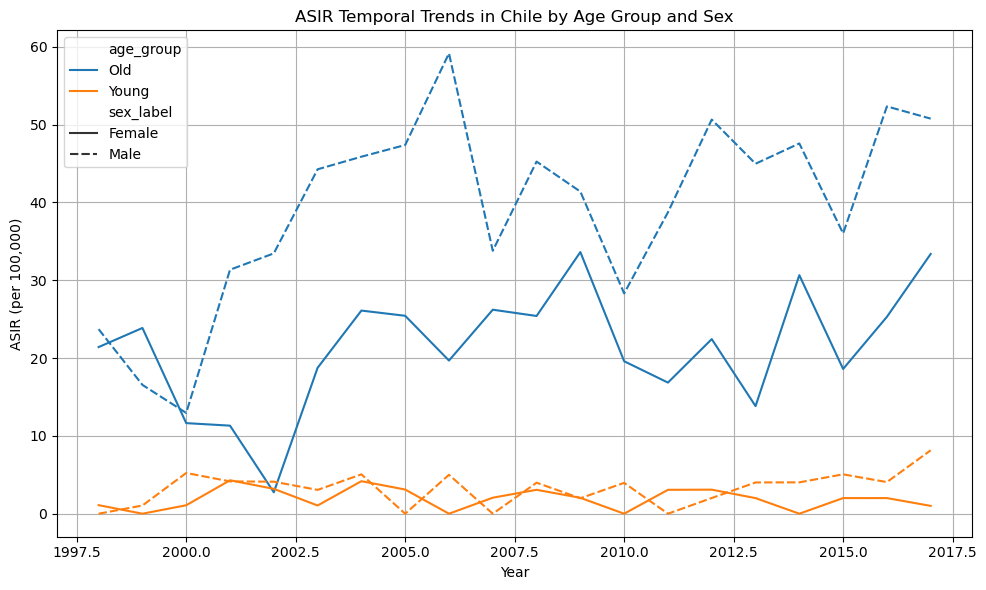

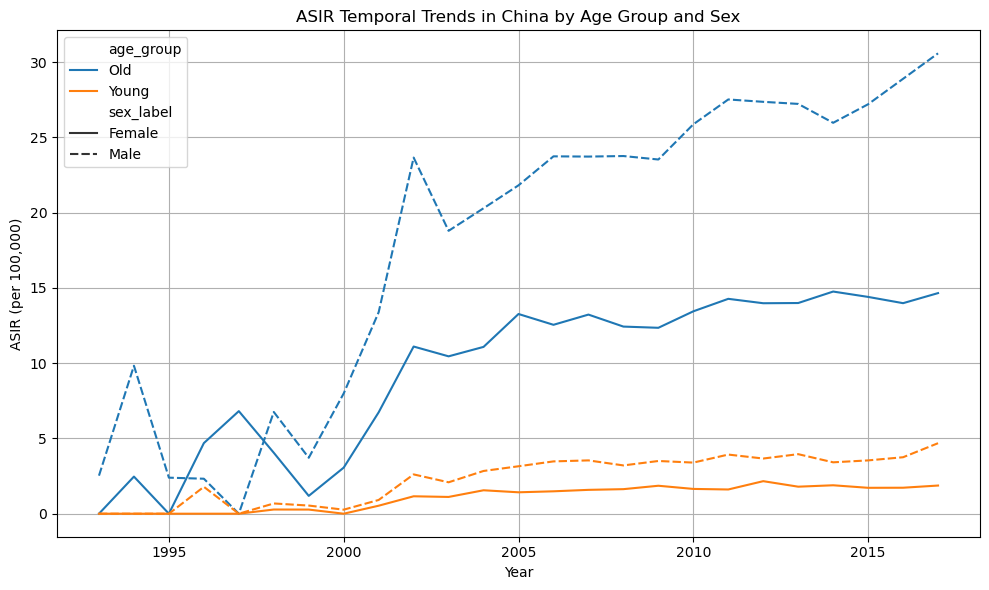

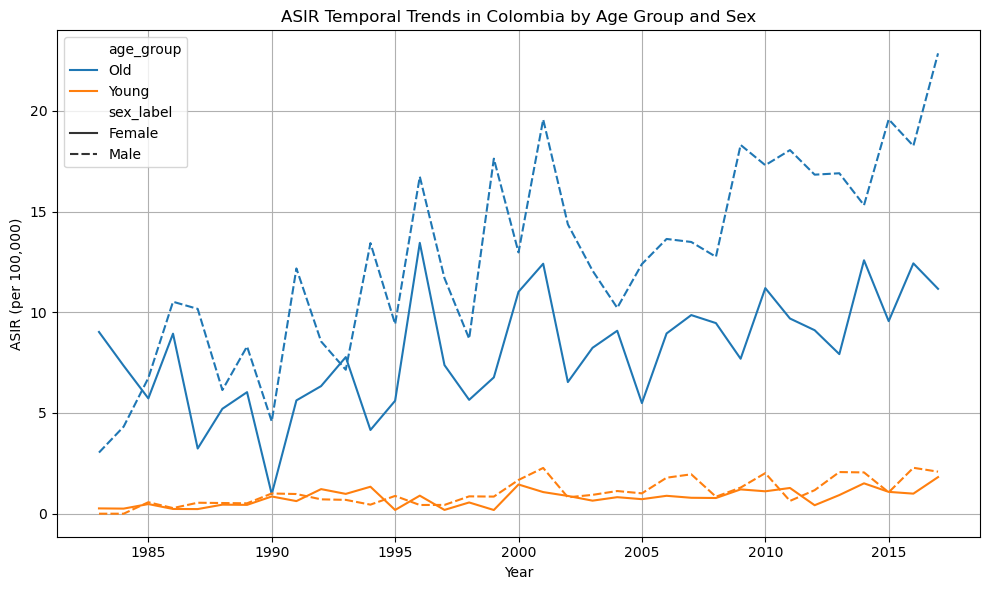

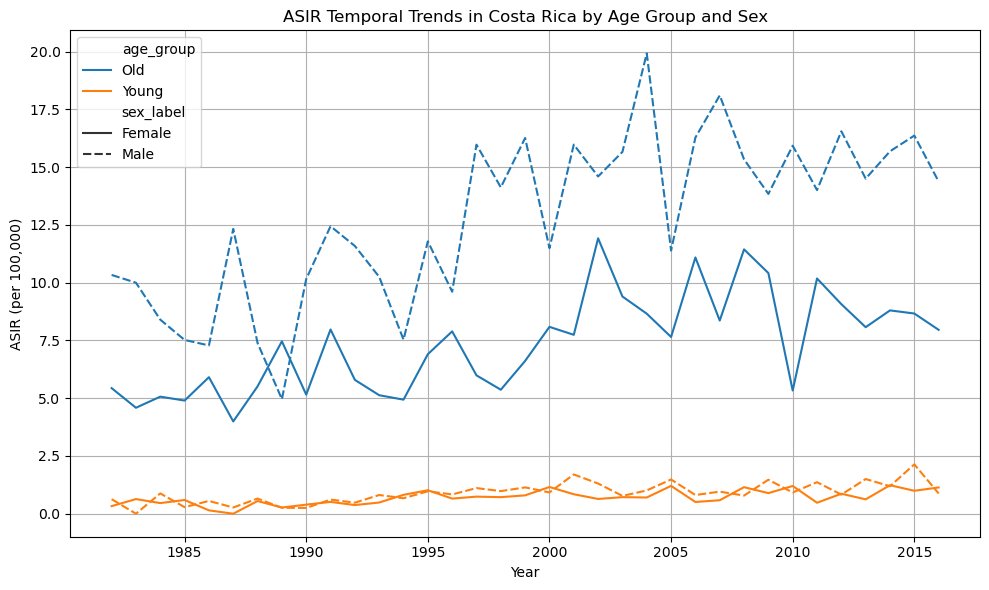

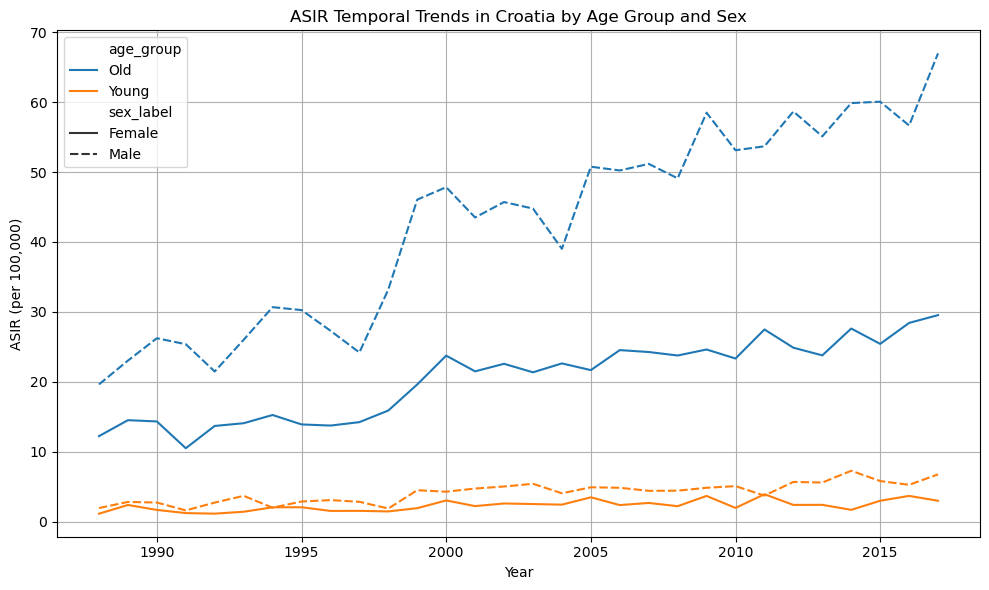

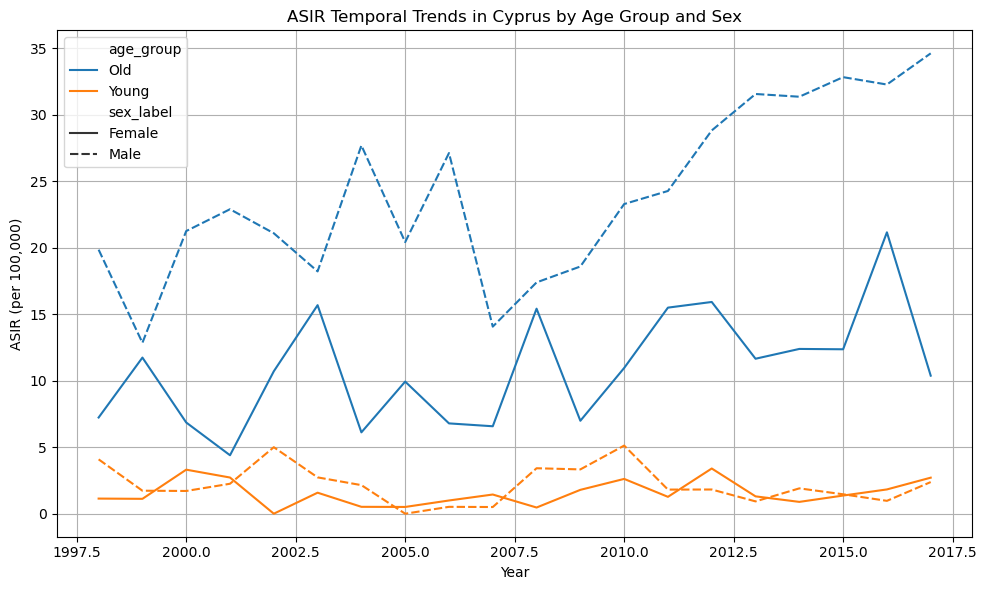

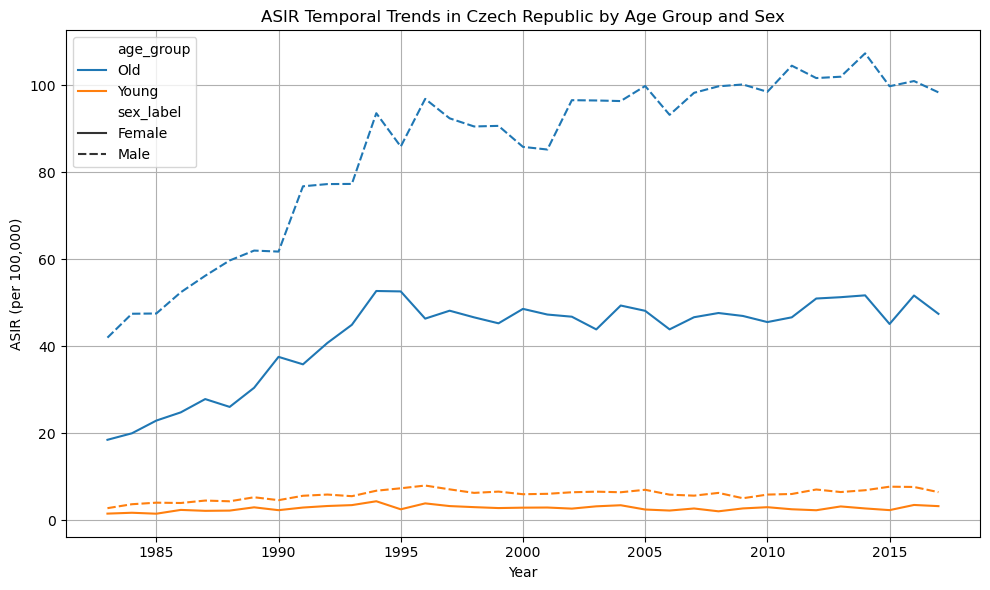

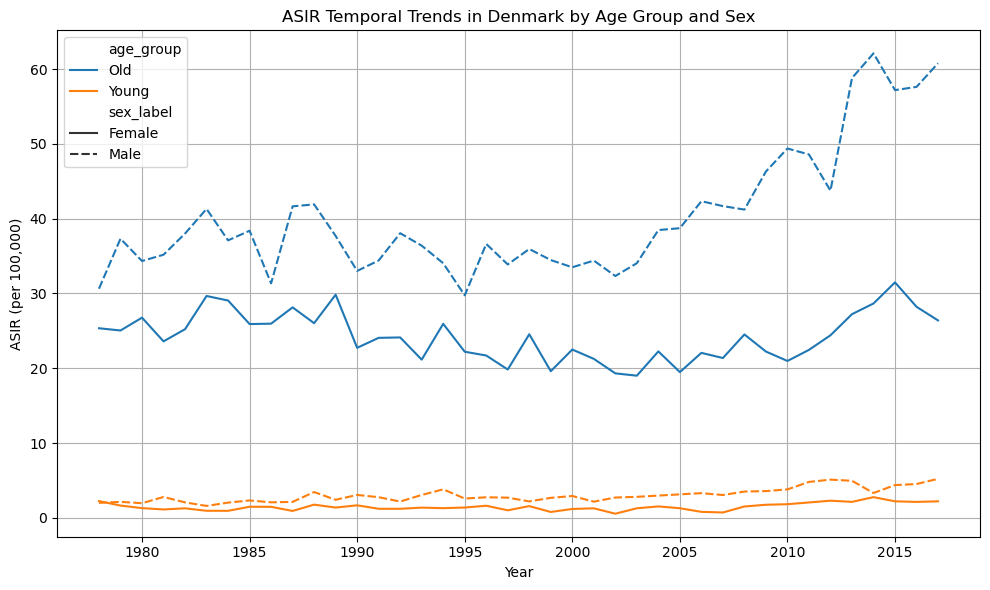

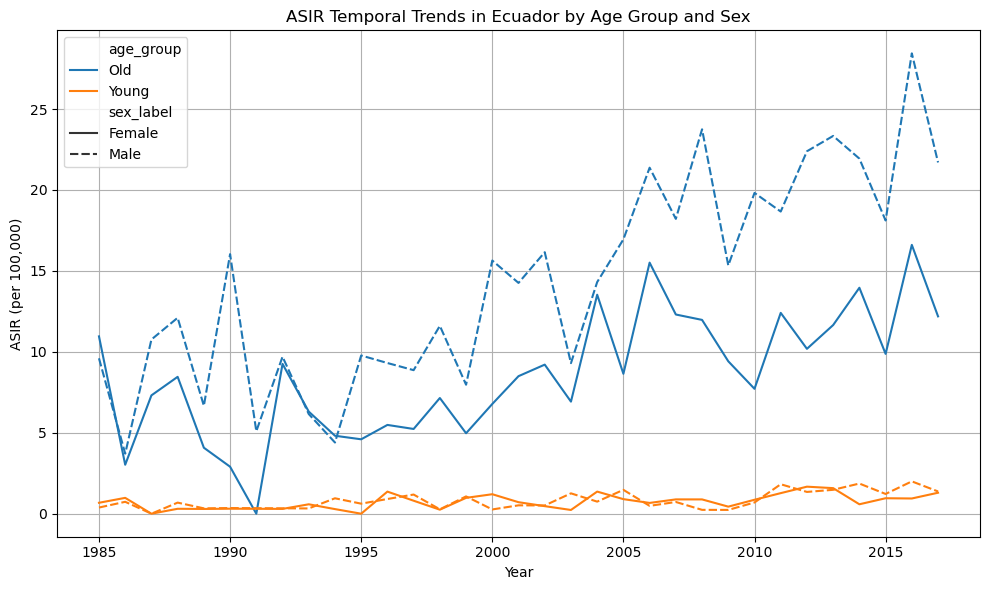

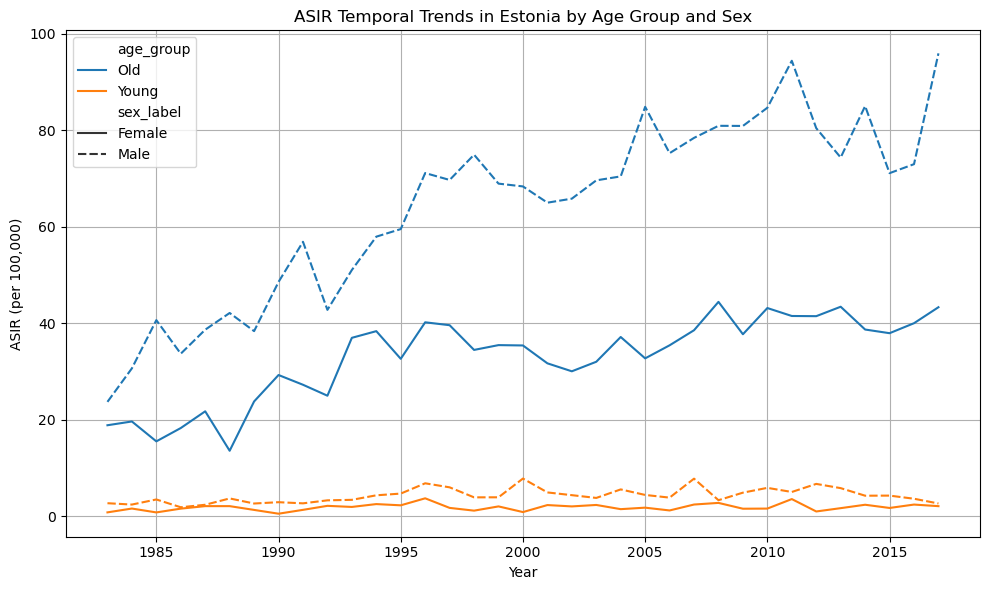

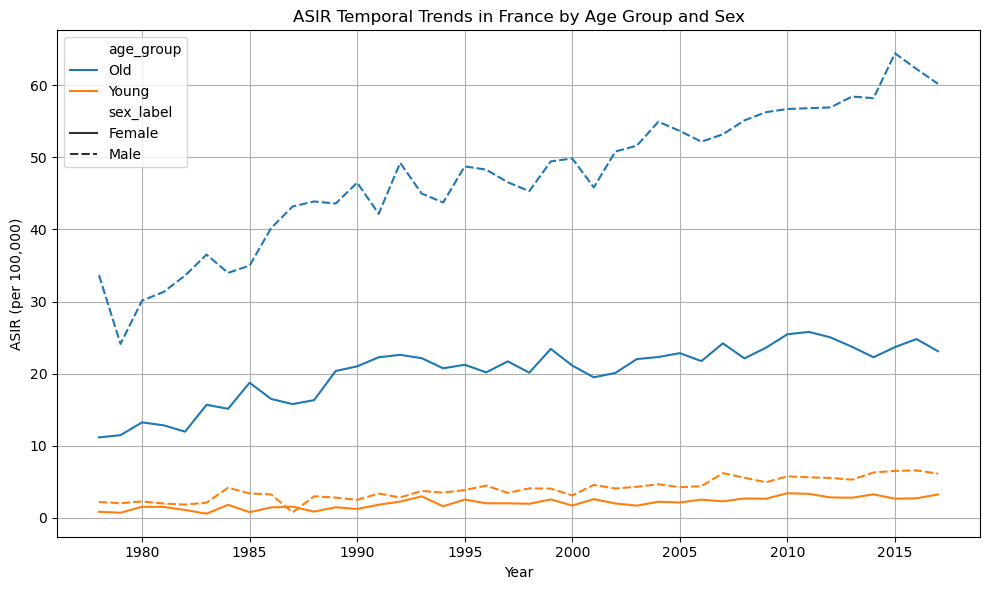

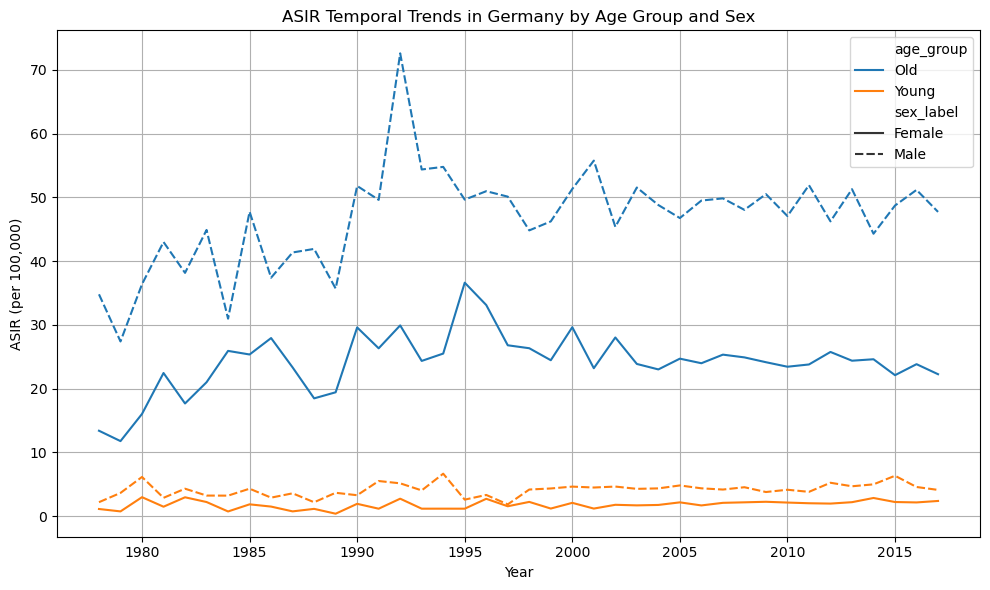

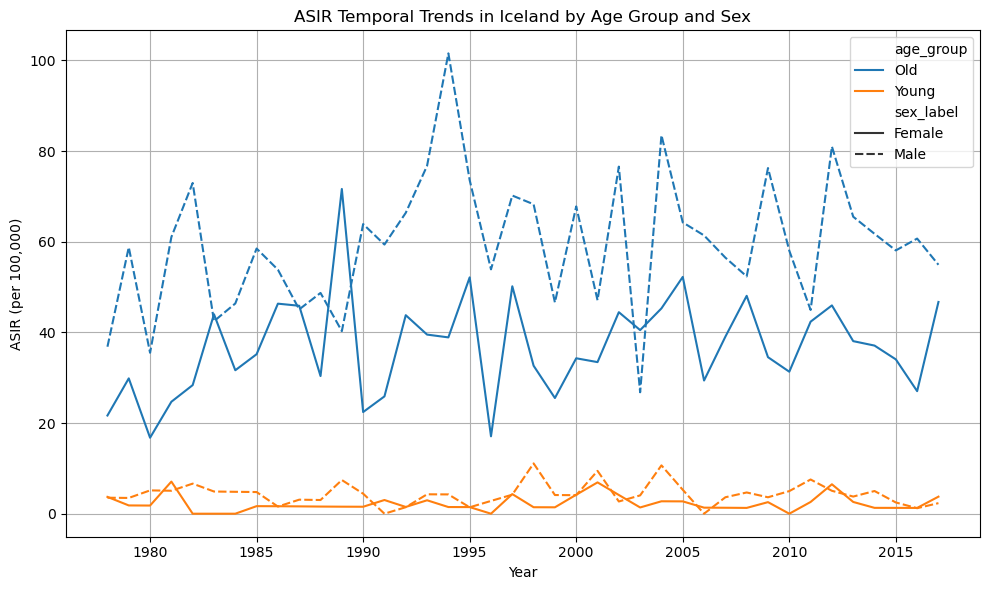

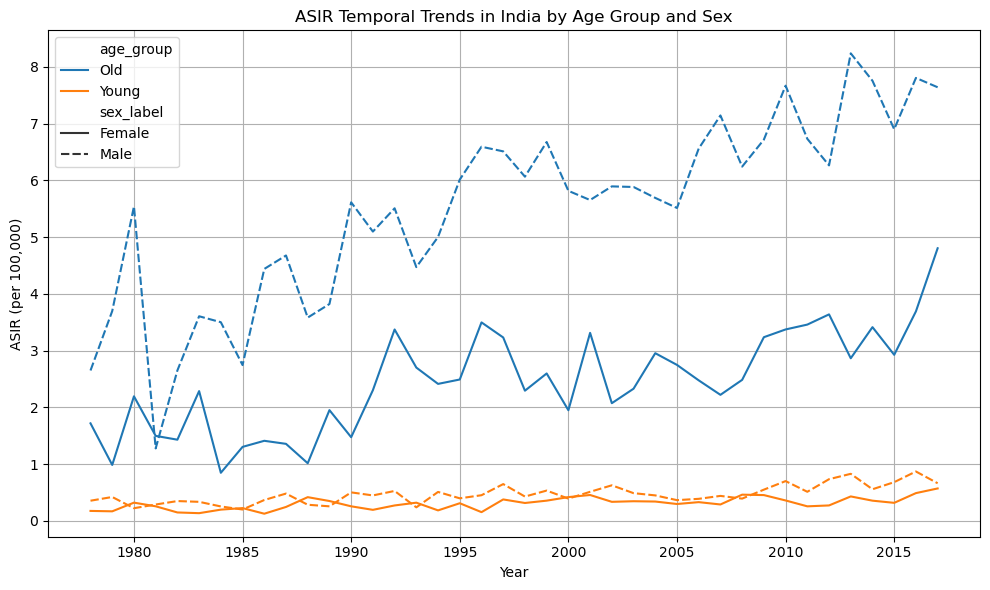

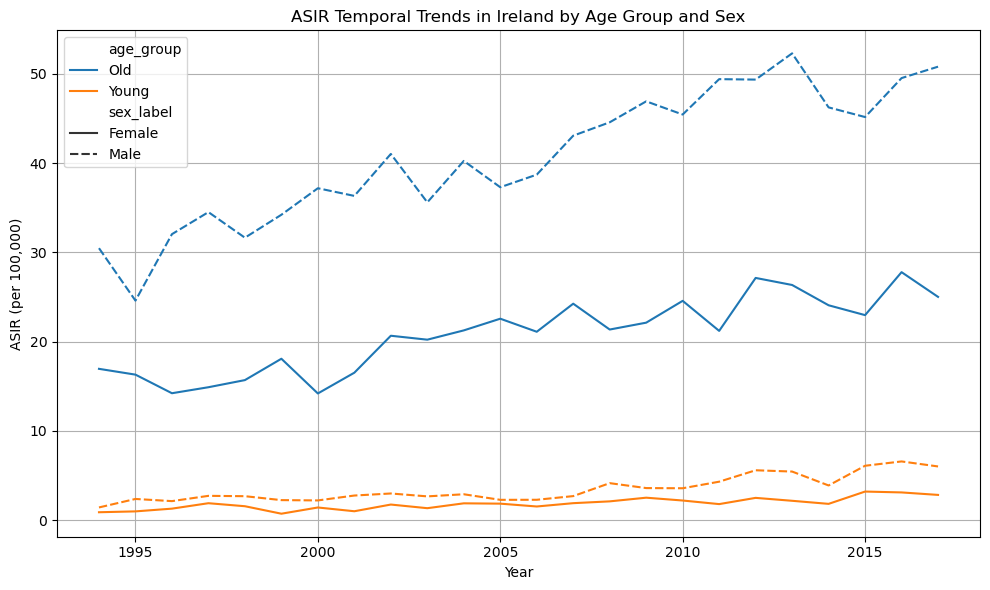

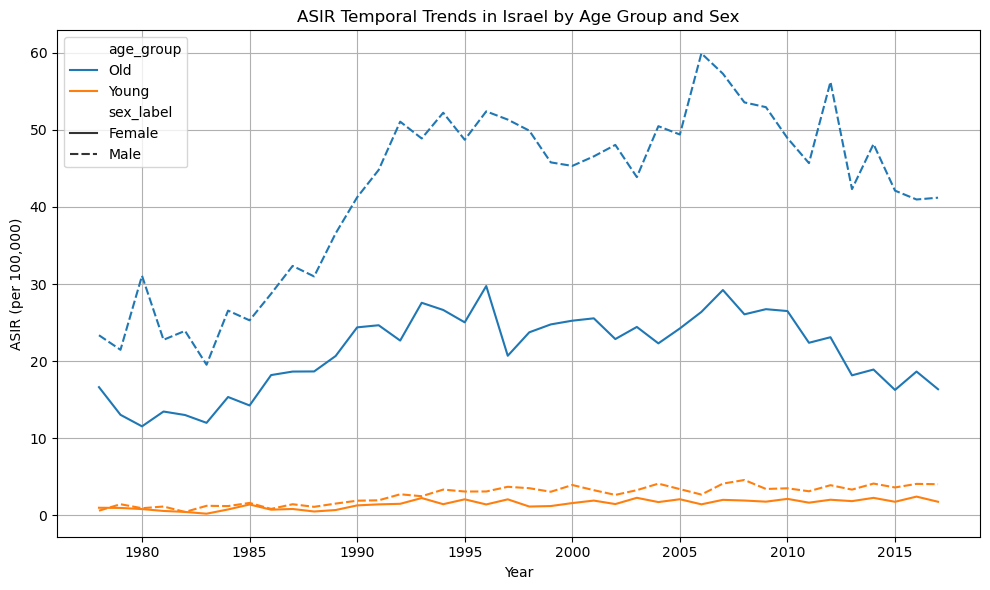

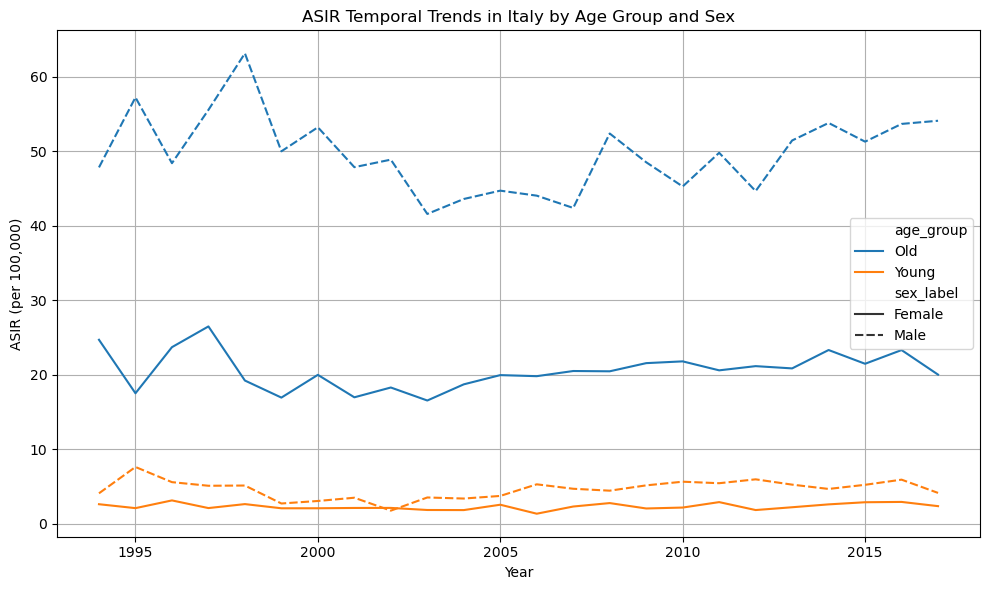

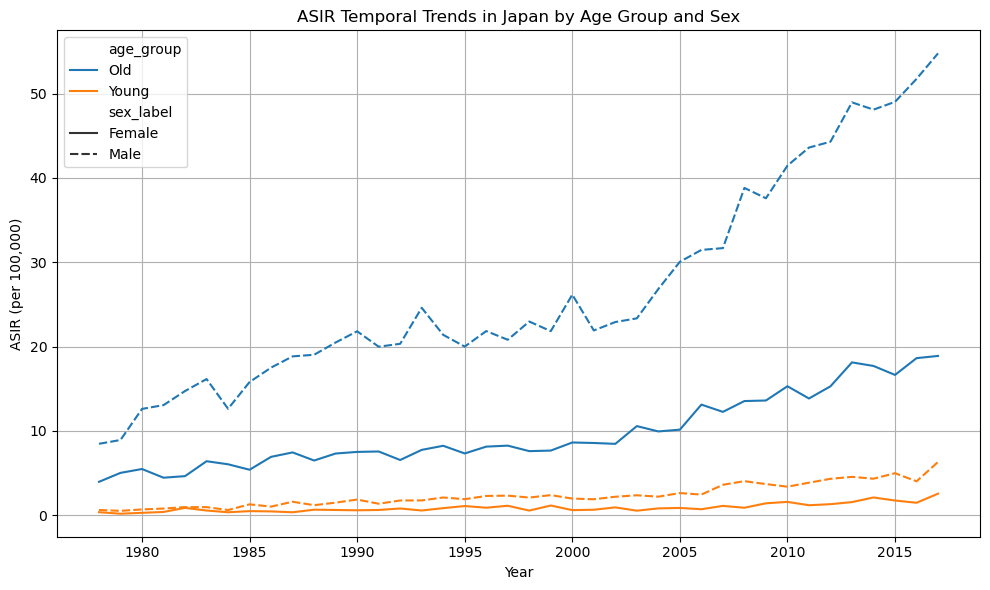

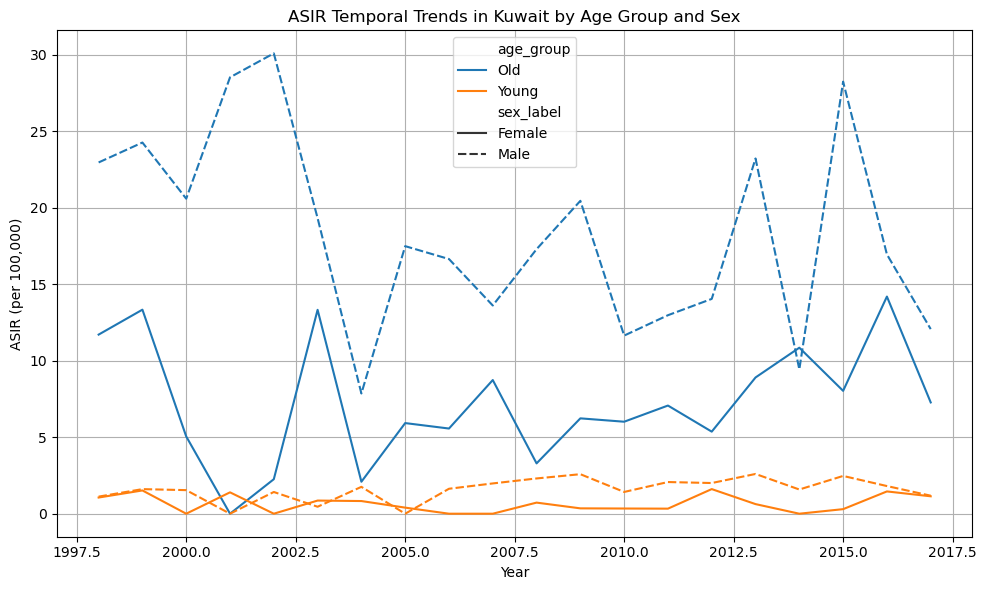

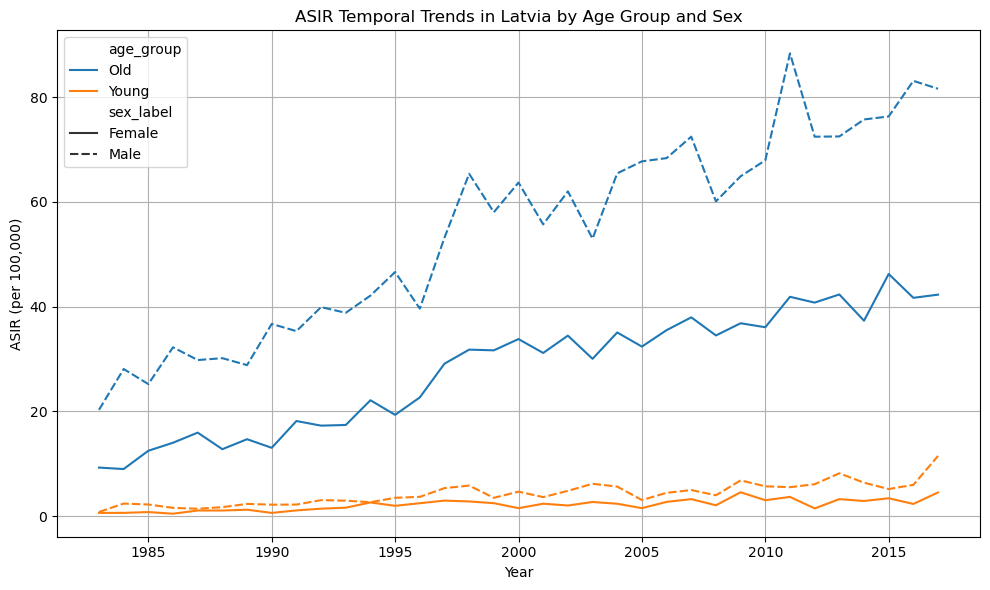

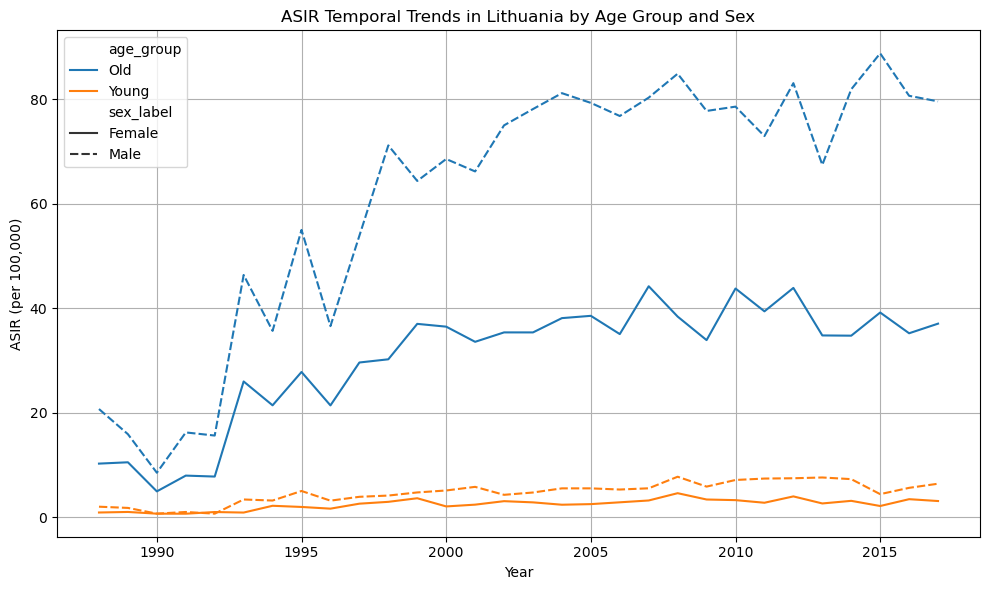

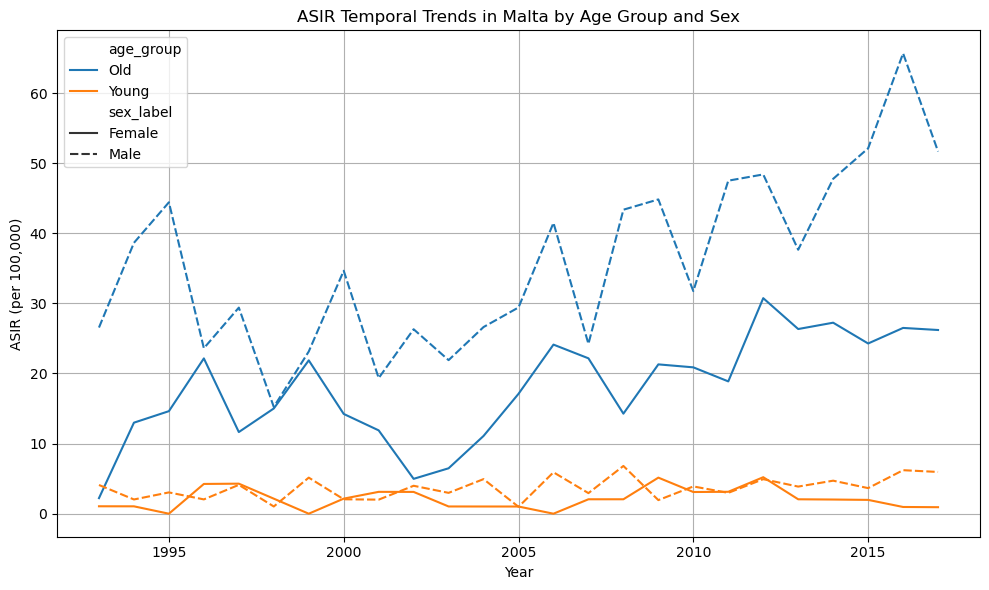

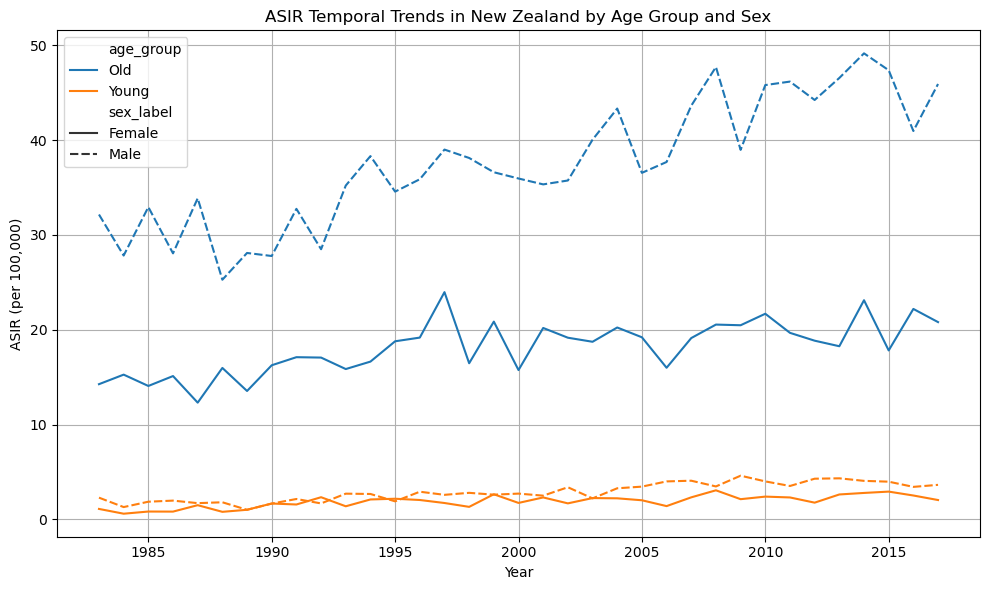

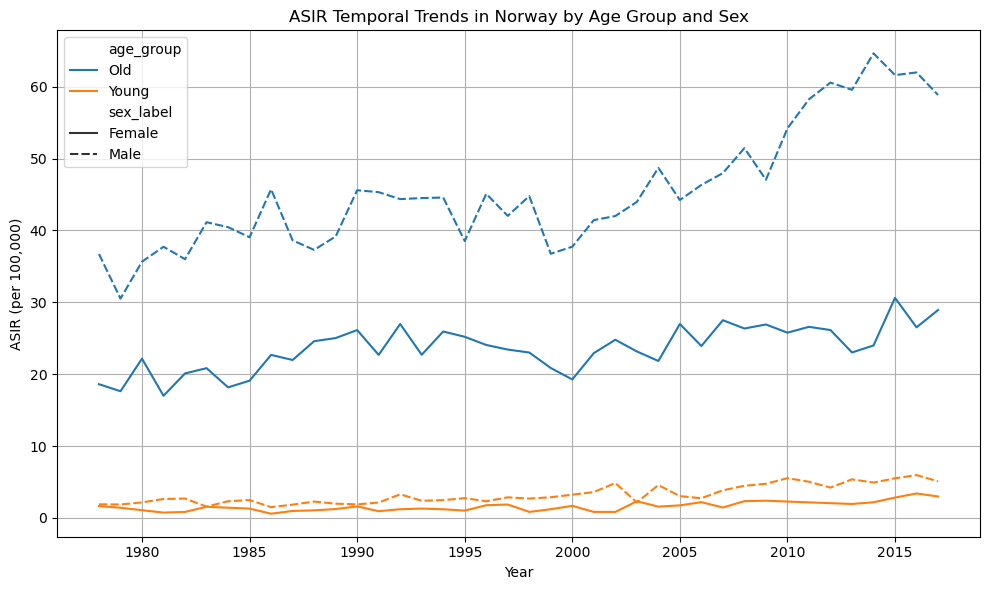

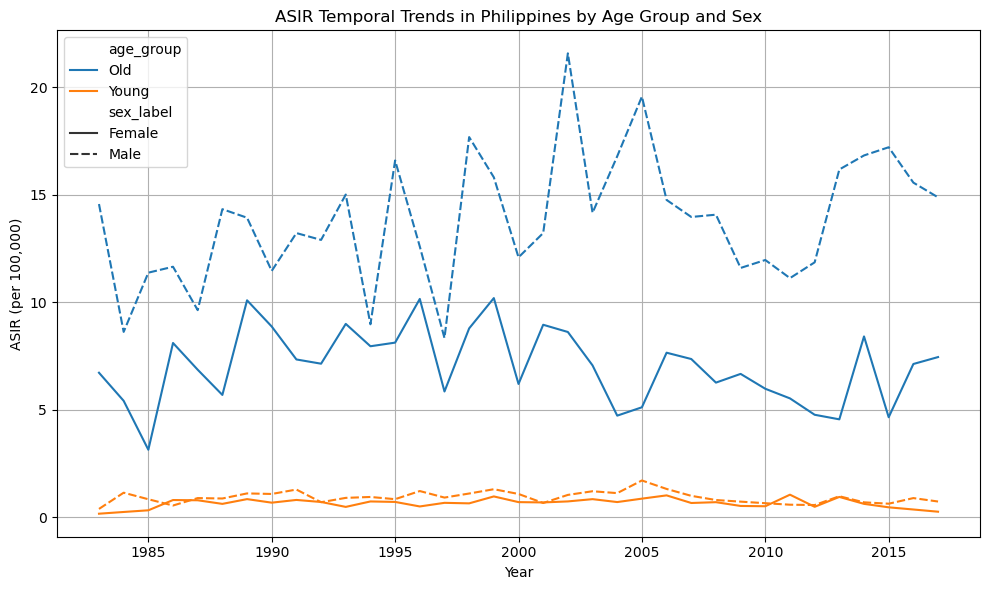

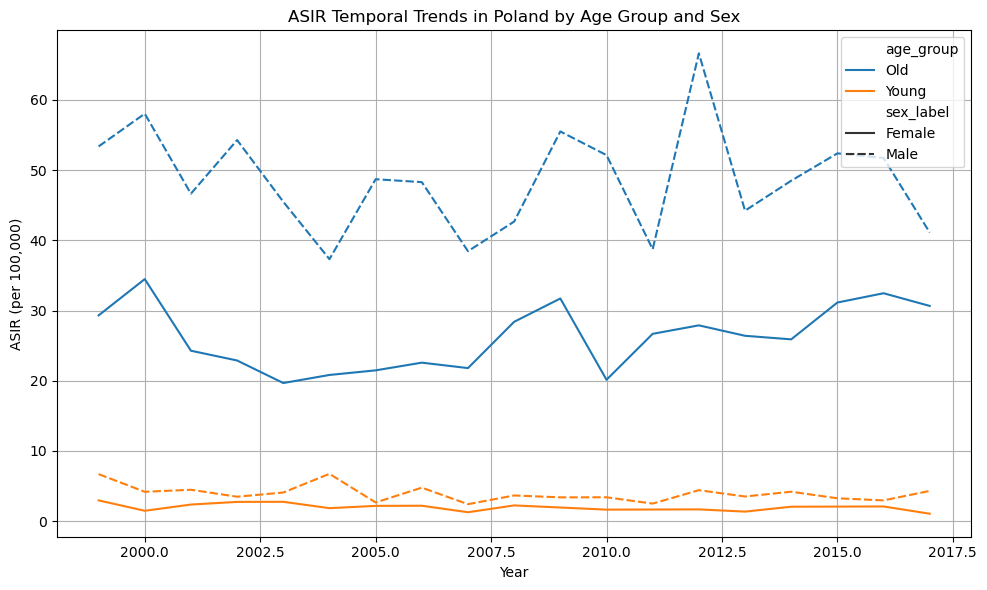

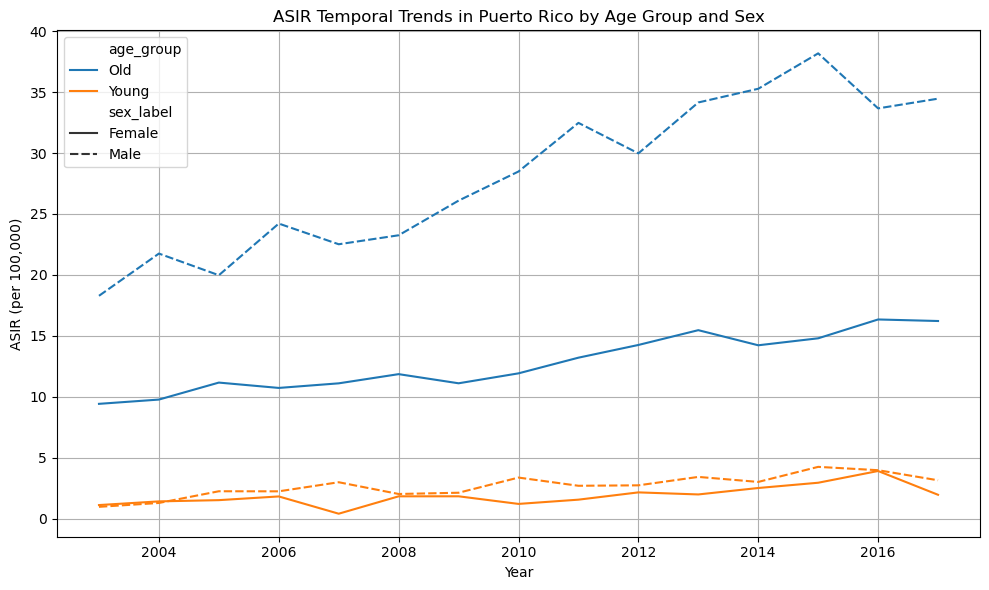

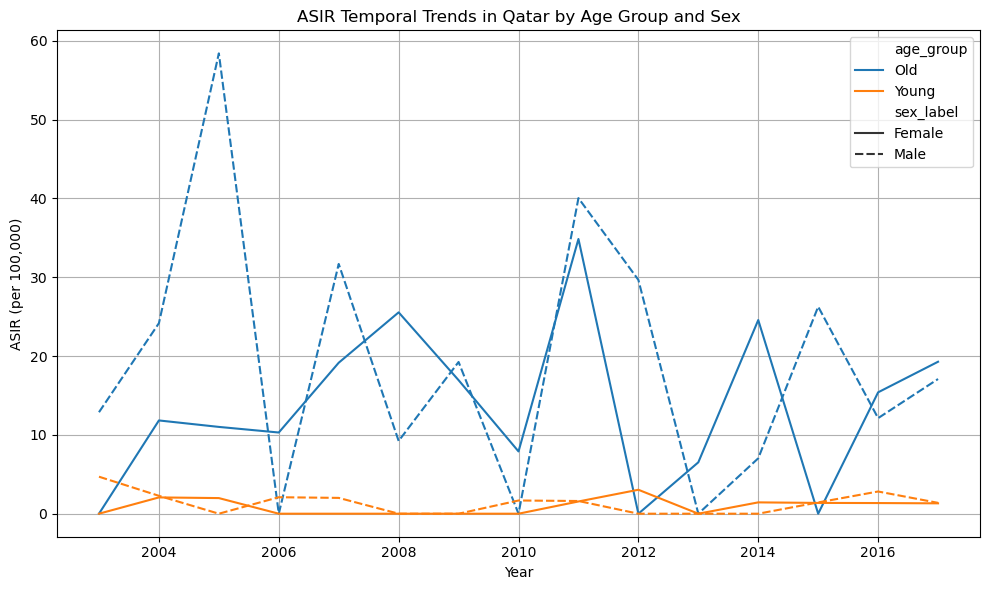

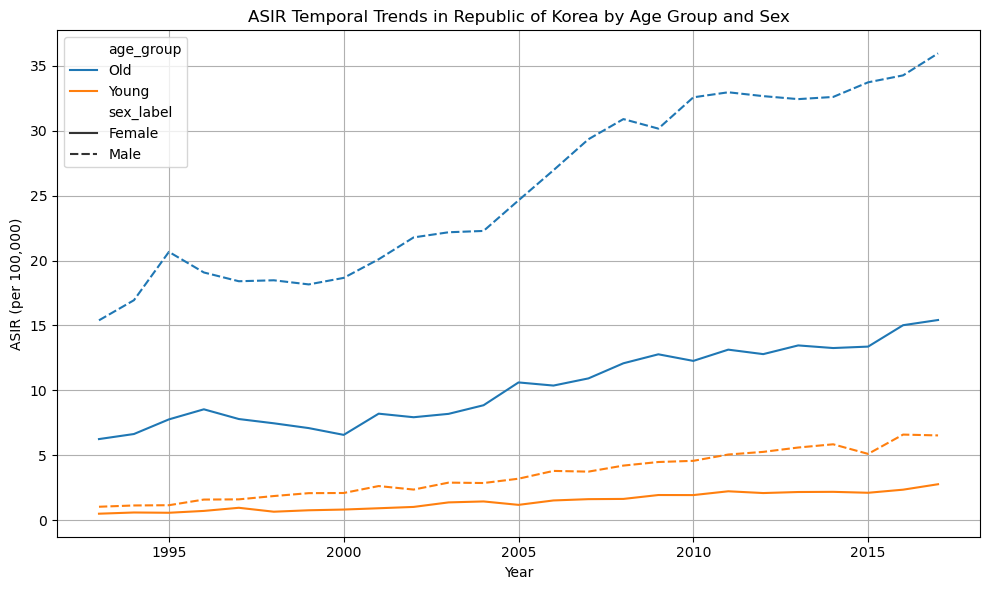

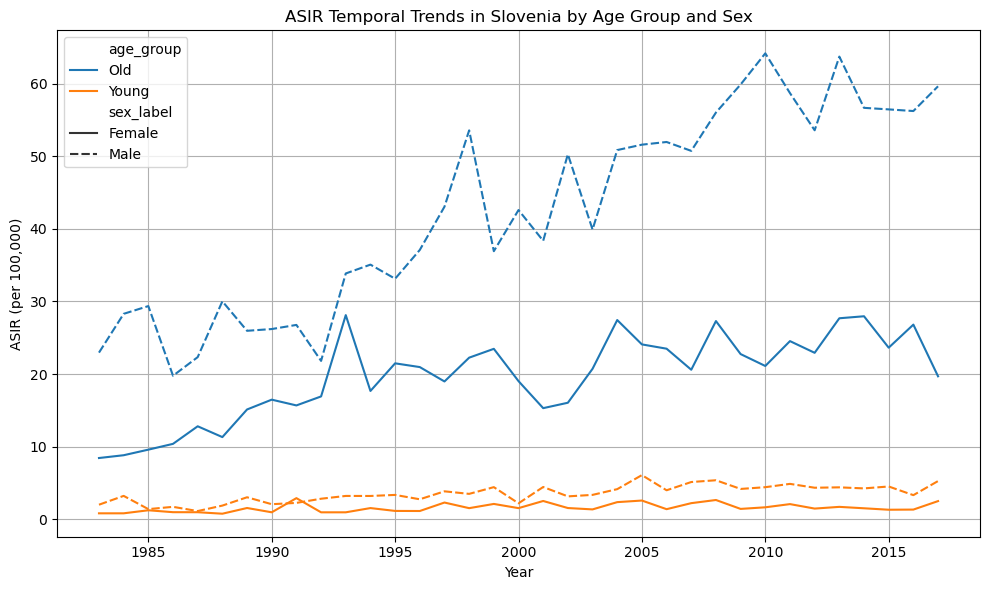

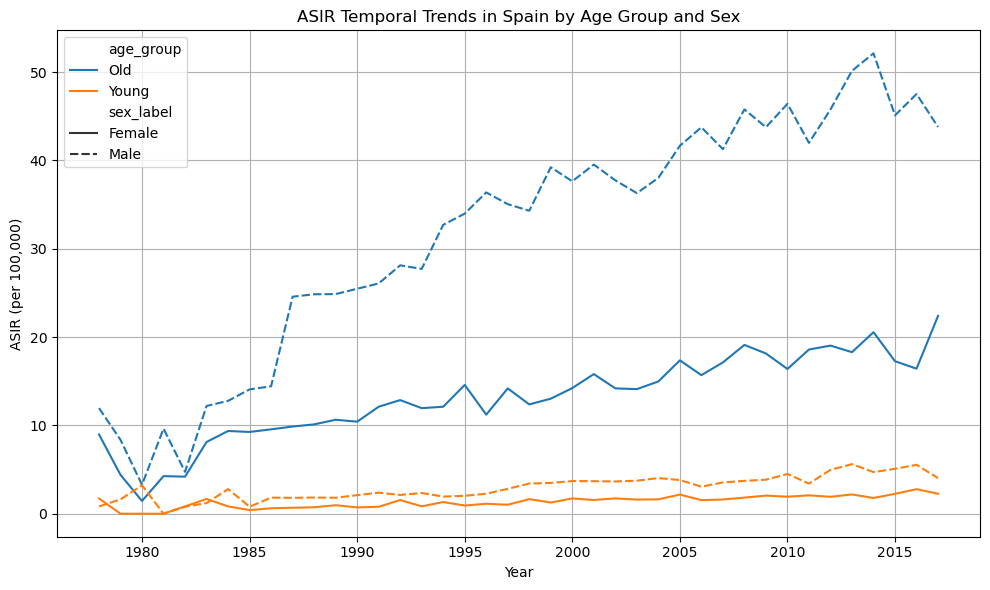

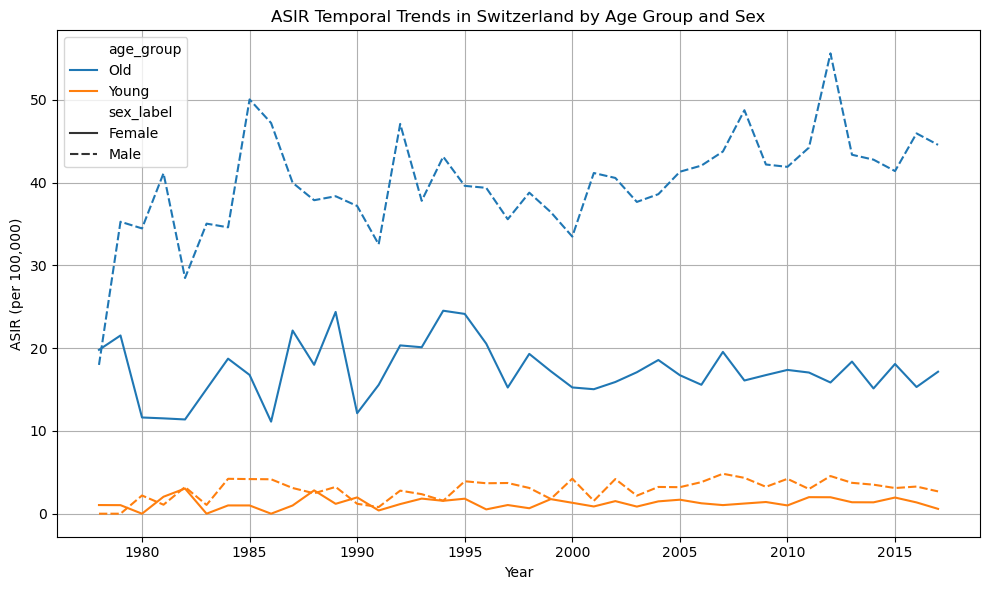

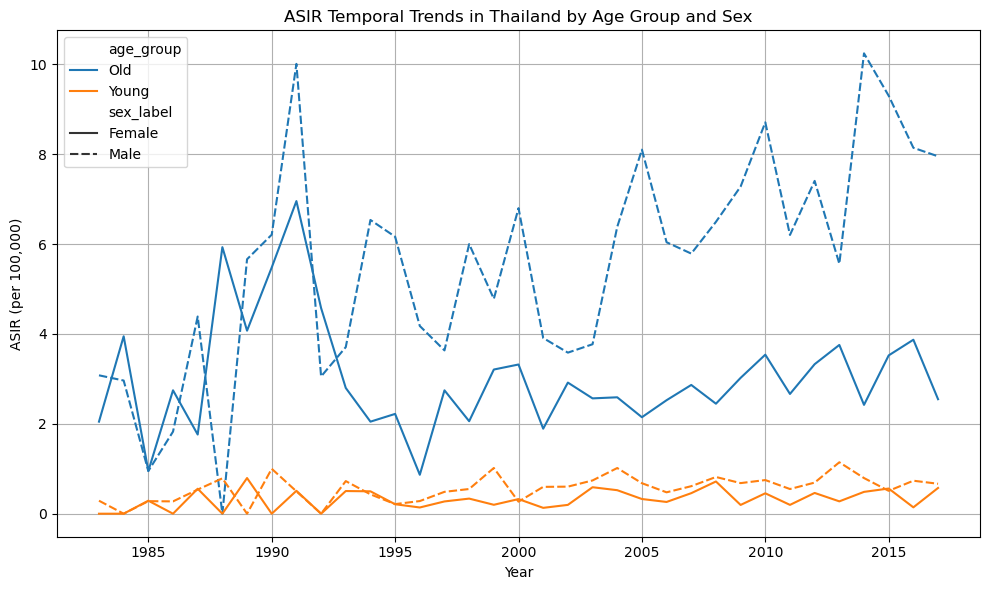

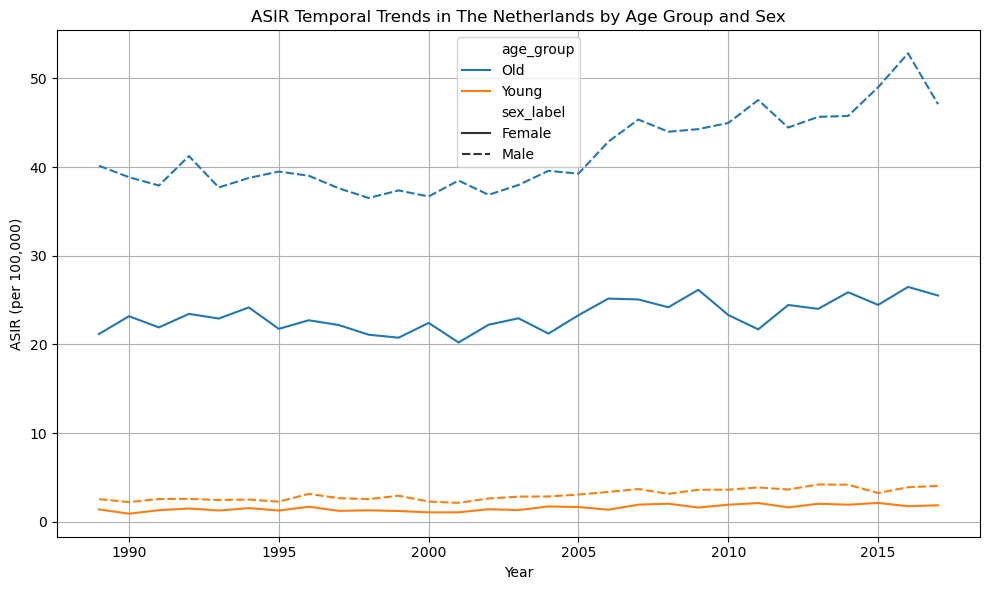

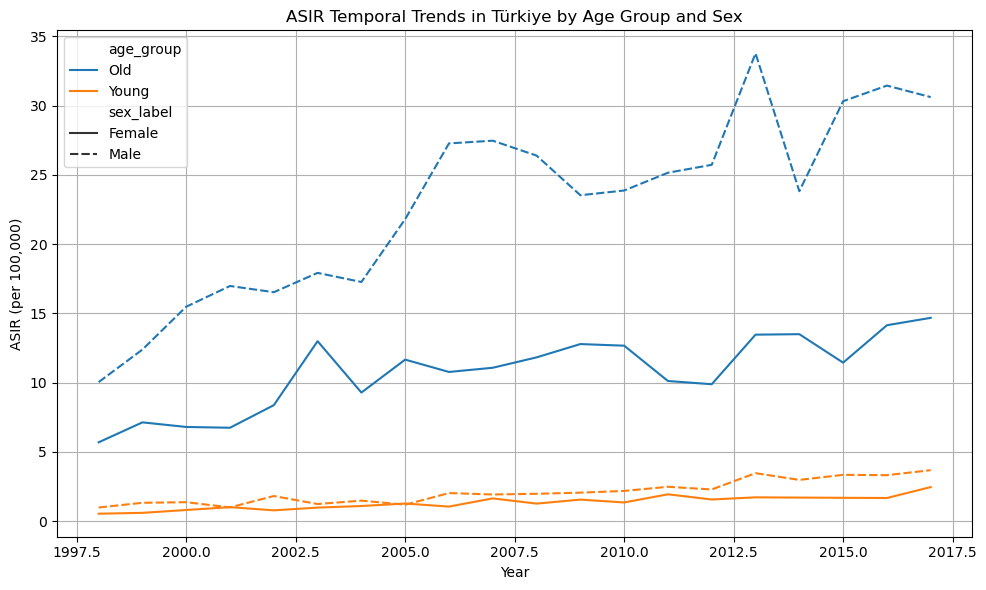

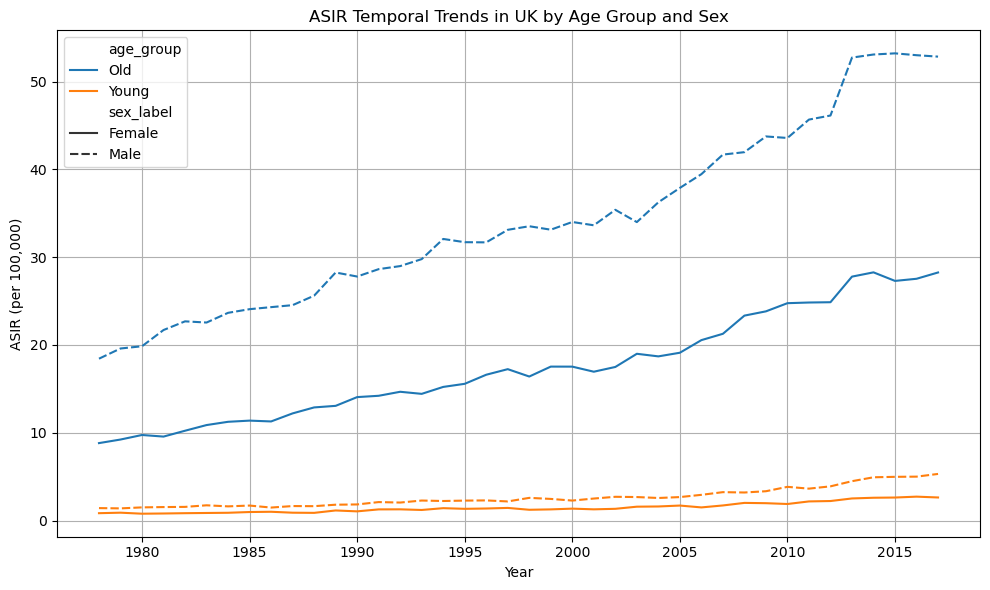

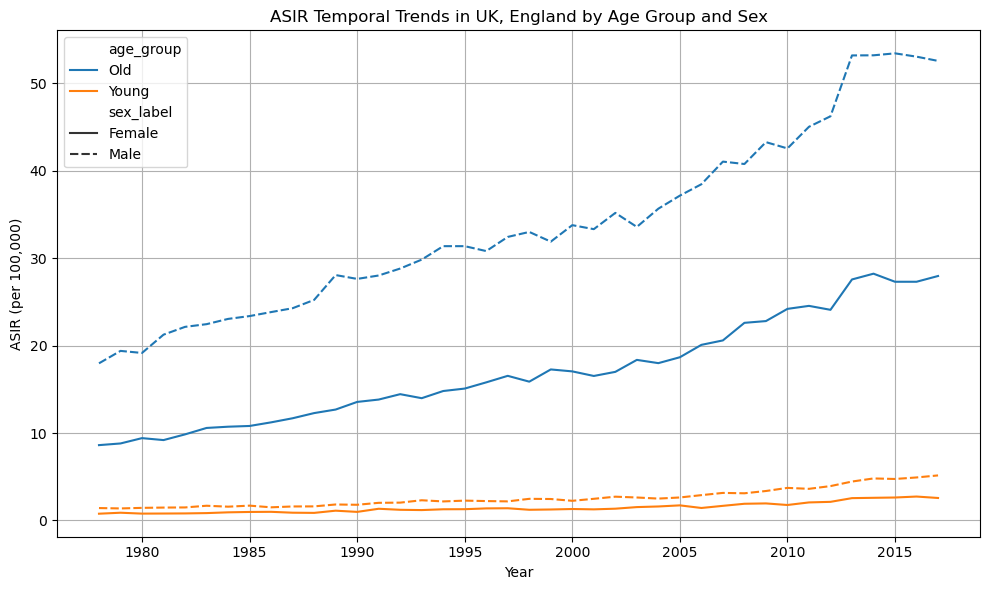

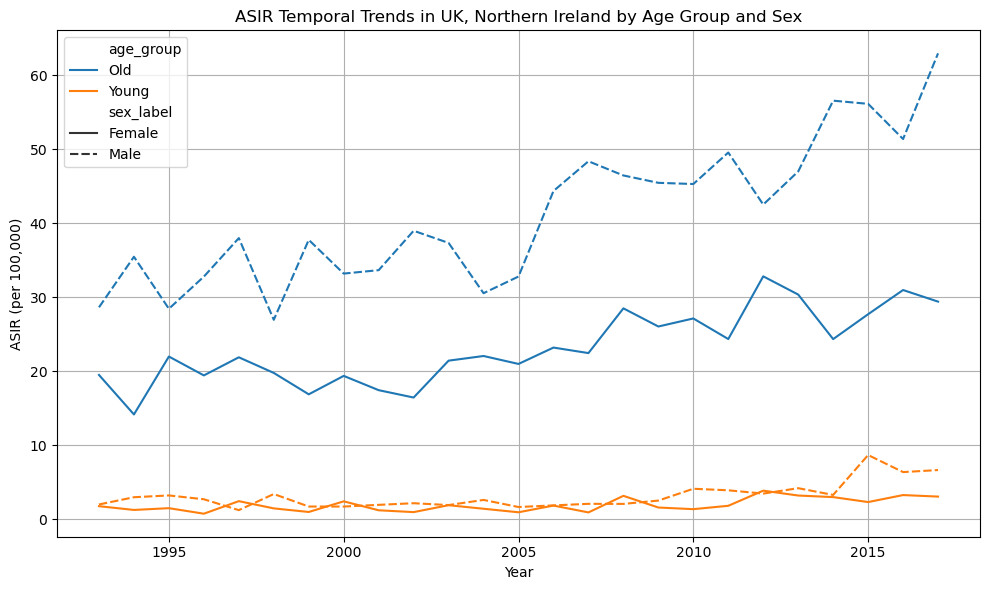

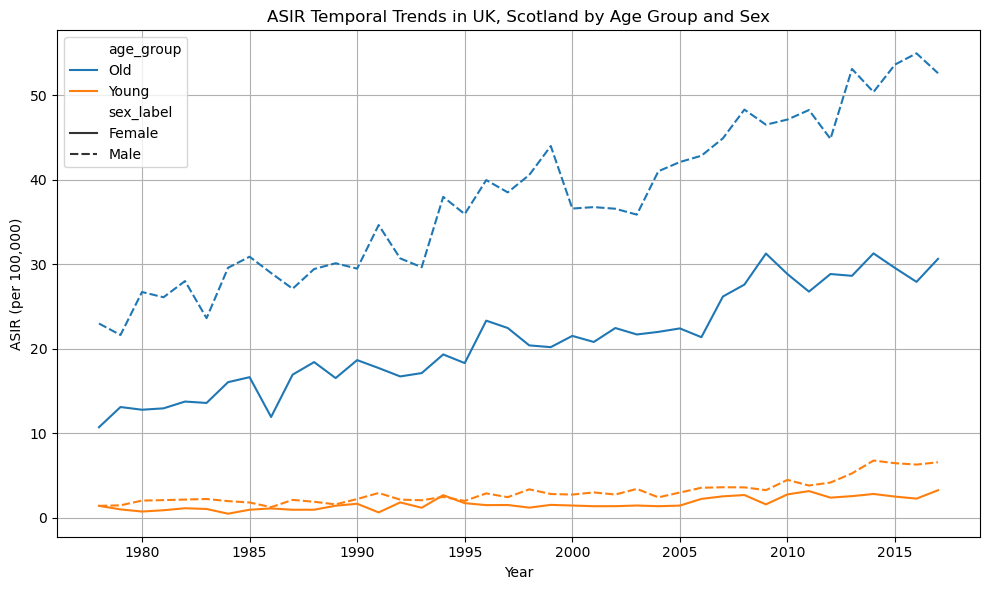

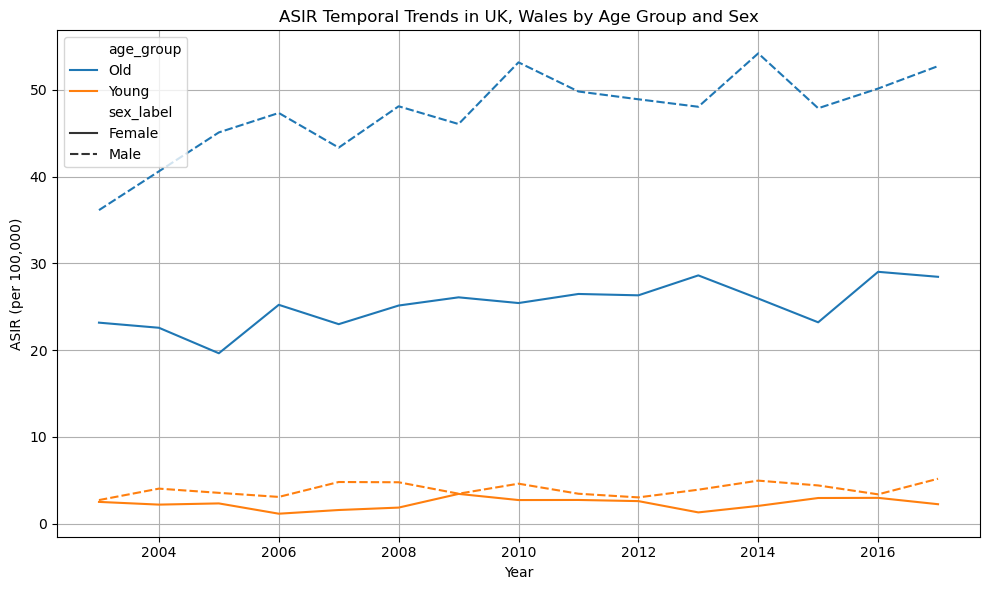

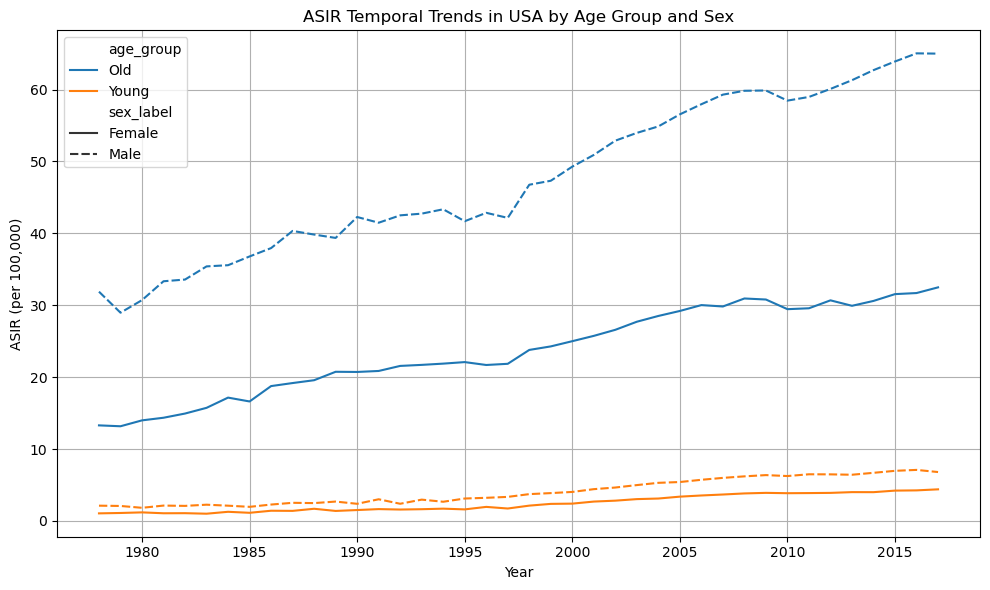

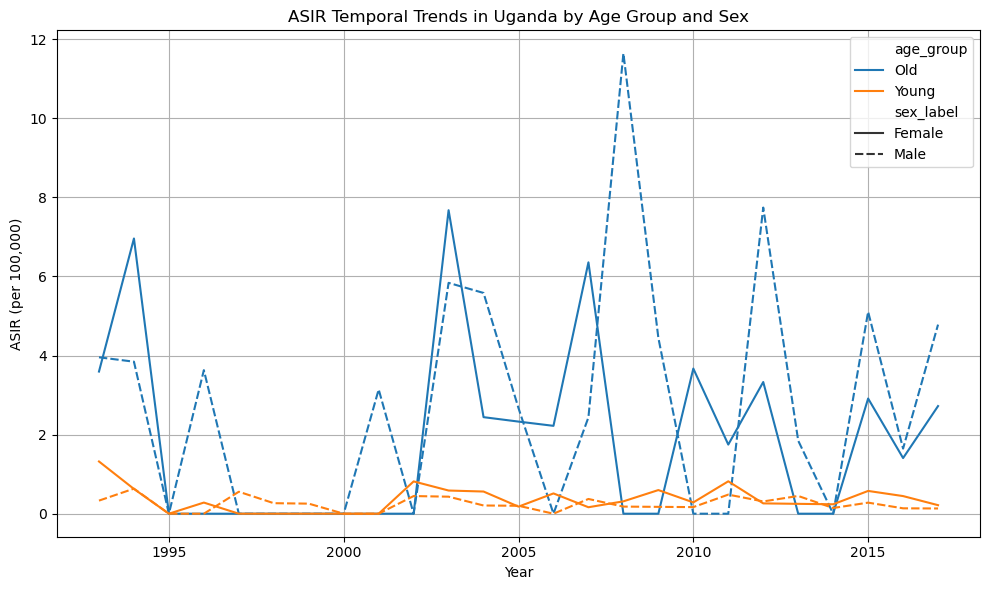

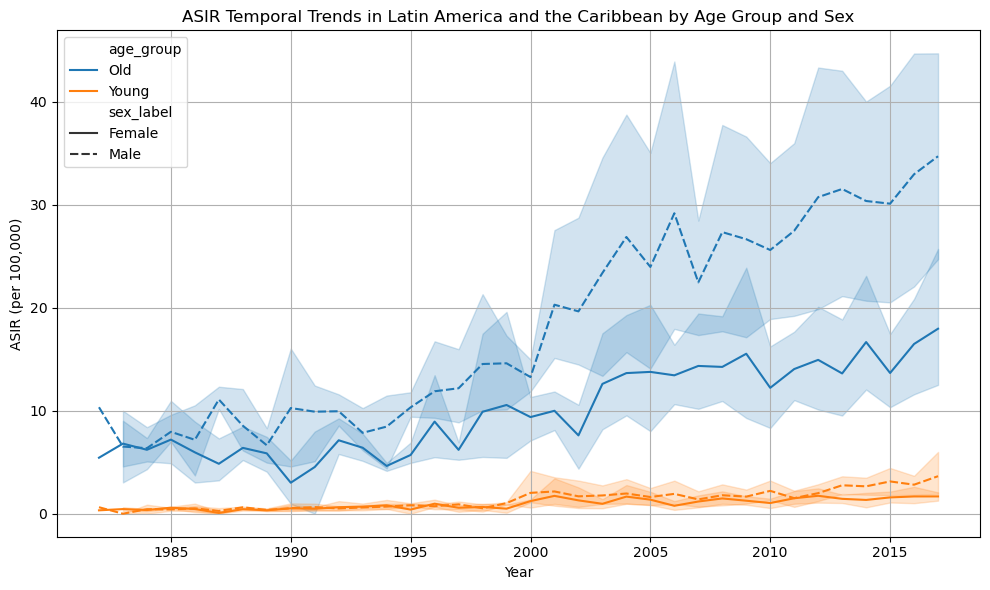

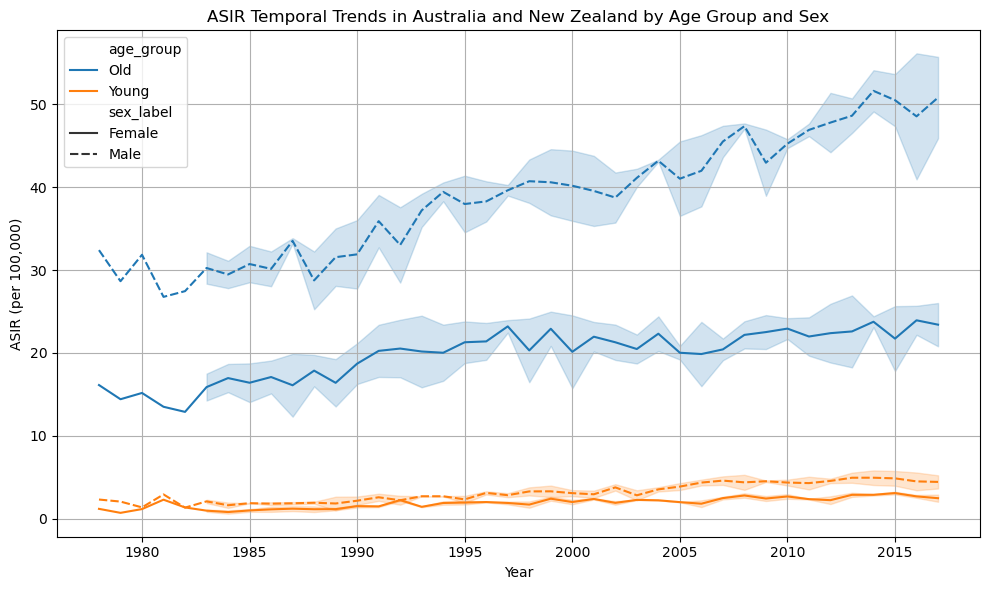

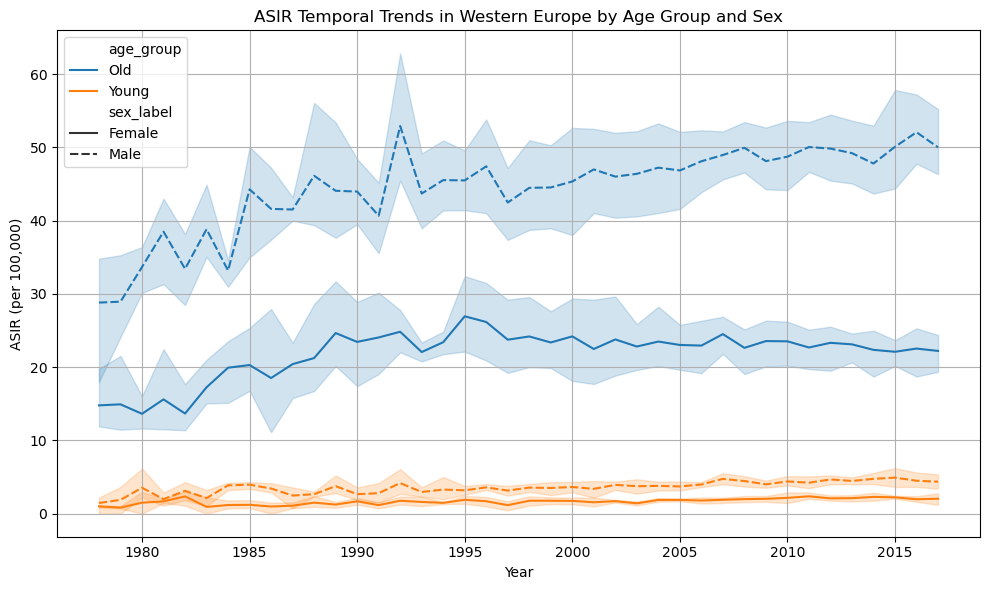

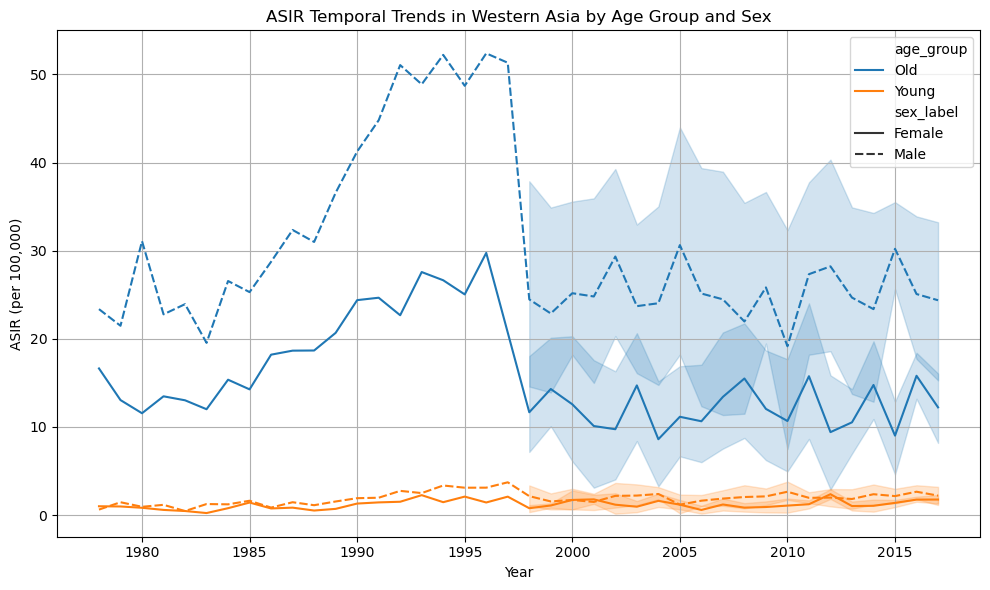

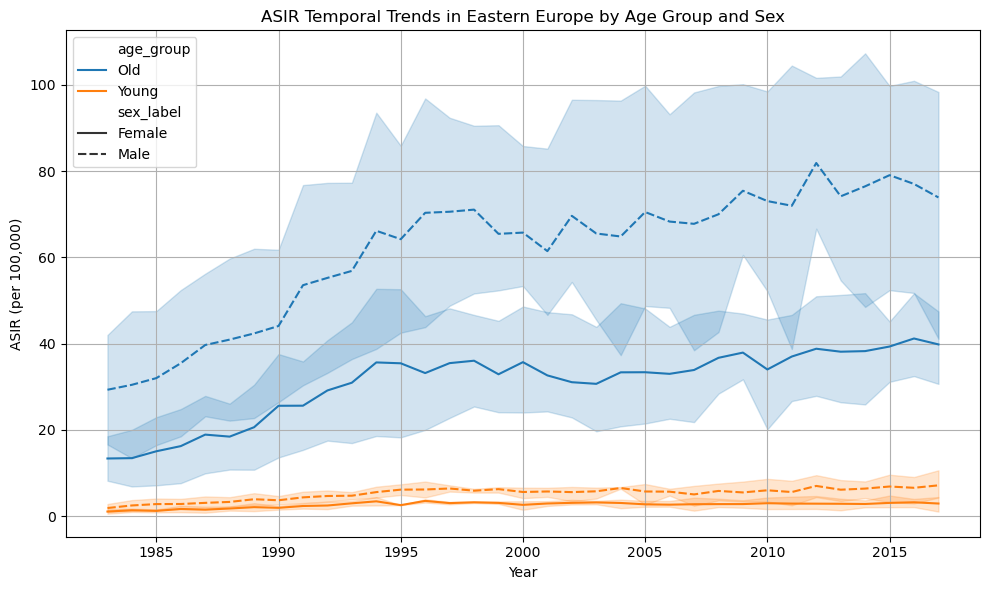

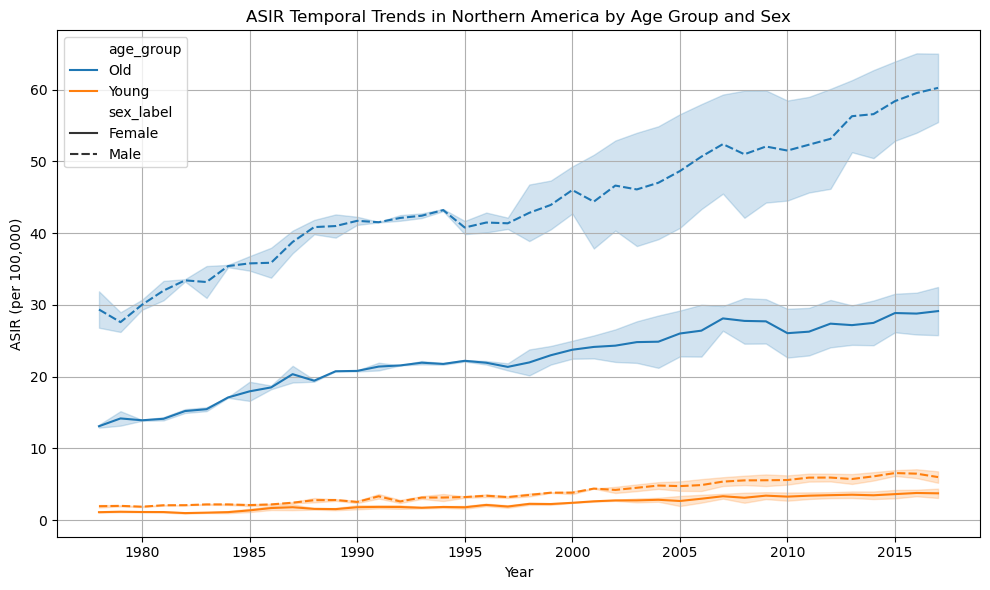

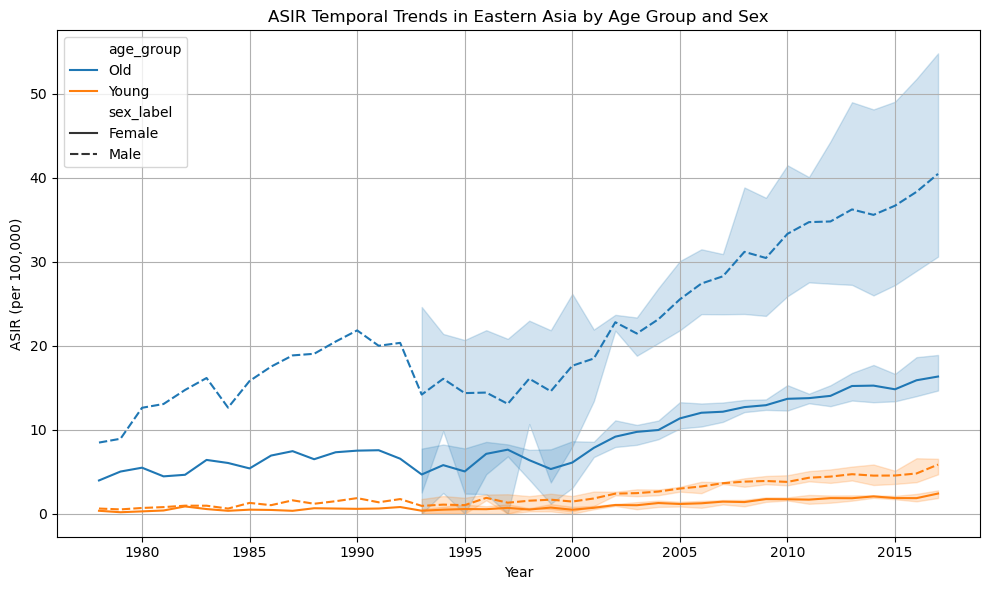

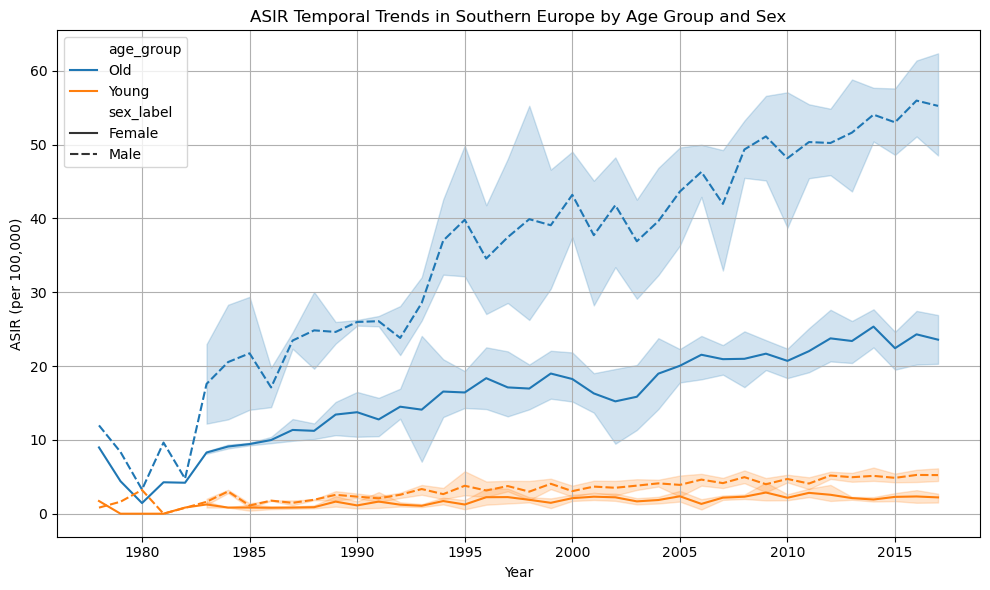

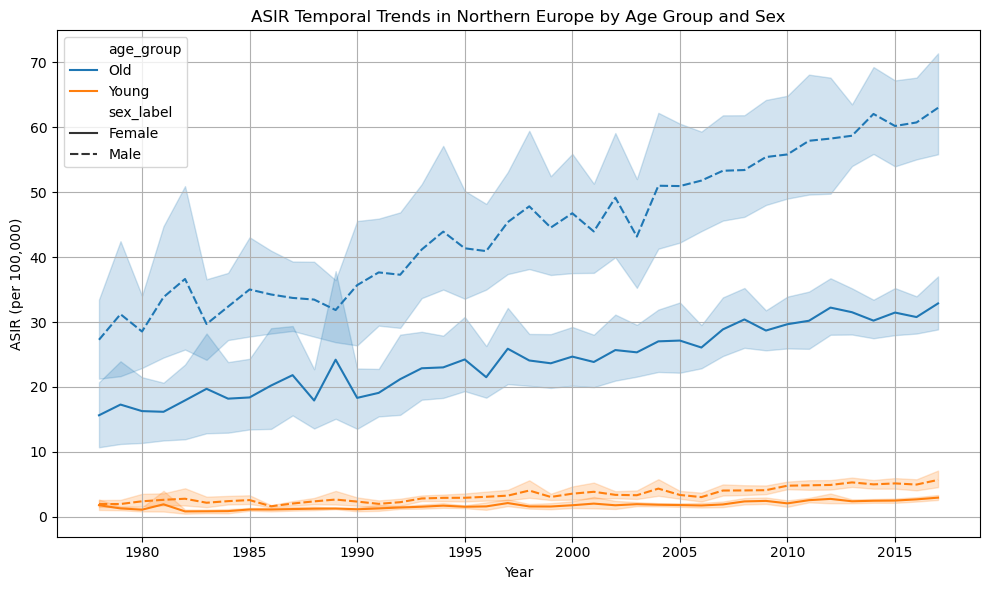

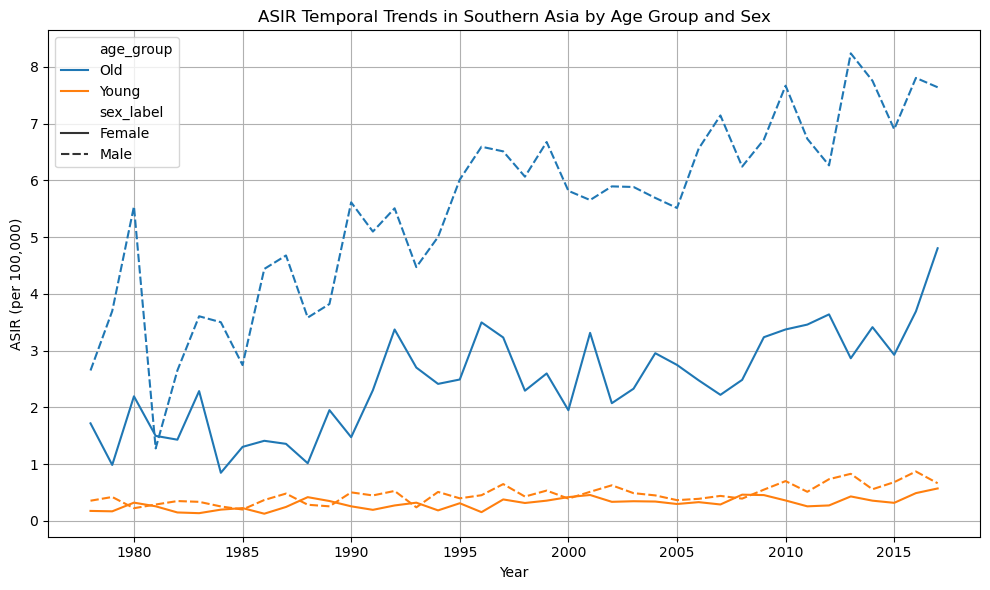

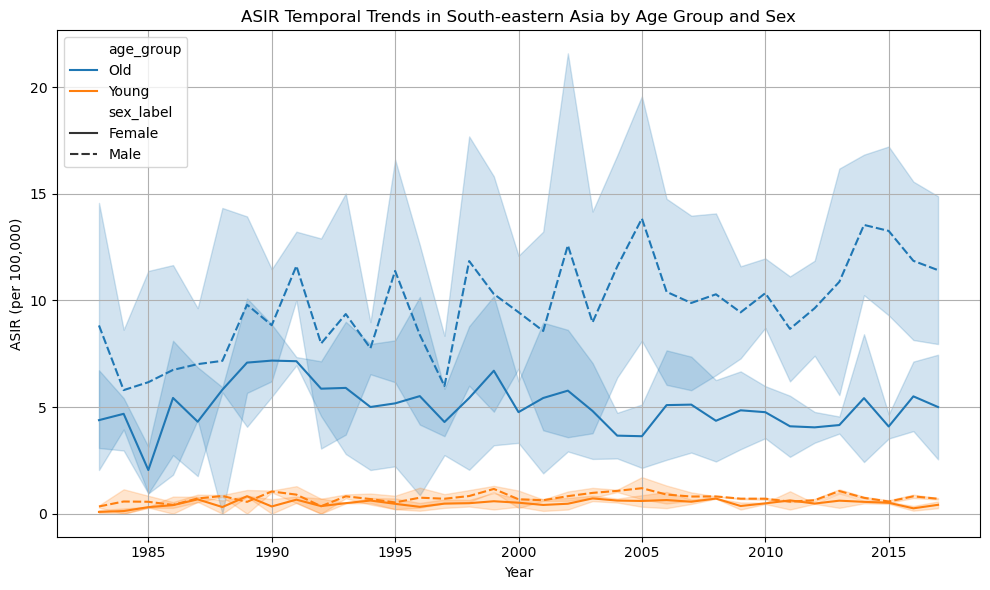

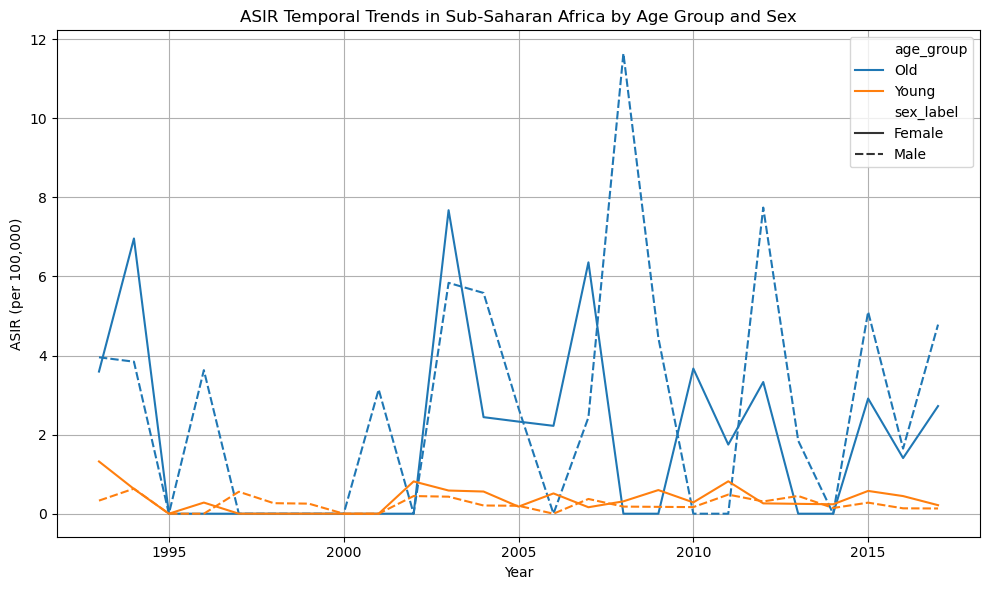

In [ ]:
# --- Country-Level Temporal Trends ---

unique_countries = country_aggregated_df2['country'].unique()

# Create a plot for each country
for country in unique_countries:
    plt.figure(figsize=(10, 6))
    data = country_aggregated_df2[country_aggregated_df2['country'] == country]
    sns.lineplot(data=data, x='year', y='ASIR', hue='age_group', style='sex_label')
    plt.title(f'ASIR Temporal Trends in {country} by Age Group and Sex')
    plt.xlabel('Year')
    plt.ylabel('ASIR (per 100,000)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# --- Regional-Level Temporal Trends ---

unique_regions = country_aggregated_df2['region'].dropna().unique()

# Create a plot for each region
for region in unique_regions:
    plt.figure(figsize=(10, 6))
    data = country_aggregated_df2[country_aggregated_df2['region'] == region]
    sns.lineplot(data=data, x='year', y='ASIR', hue='age_group', style='sex_label')
    plt.title(f'ASIR Temporal Trends in {region} by Age Group and Sex')
    plt.xlabel('Year')
    plt.ylabel('ASIR (per 100,000)')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### Temporal trends in ASIR for both age groups (15-49 and 50+), stratified by sex

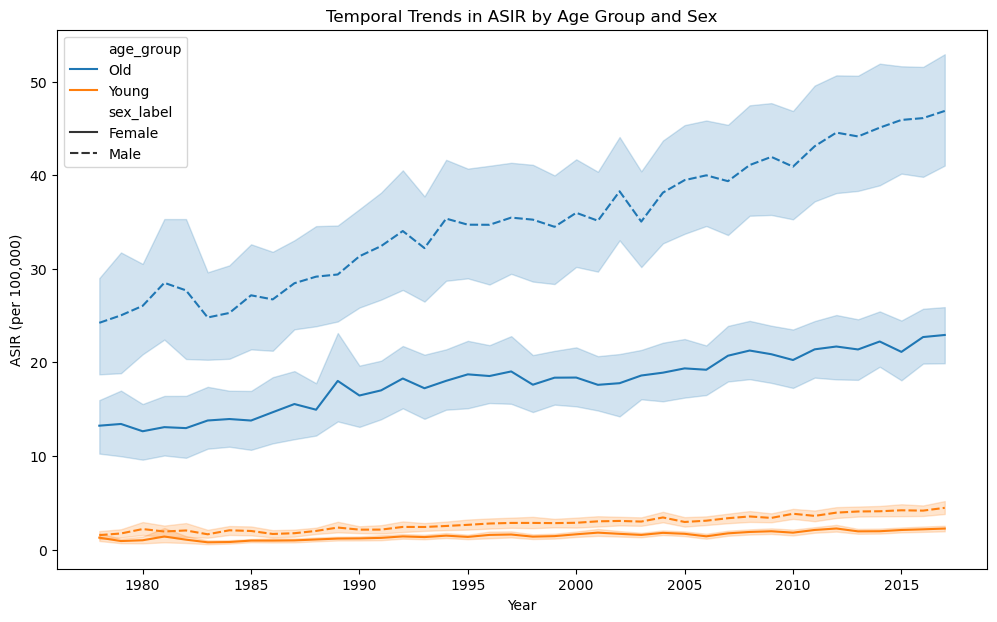

In [19]:
plt.figure(figsize=(12, 7))
sns.lineplot(data=country_aggregated_df2, x='year', y='ASIR', hue='age_group', style='sex_label')
plt.title('Temporal Trends in ASIR by Age Group and Sex')
plt.xlabel('Year')
plt.ylabel('ASIR (per 100,000)')
plt.show()

#### Time-series trend plots: Young vs Old by HDI Category

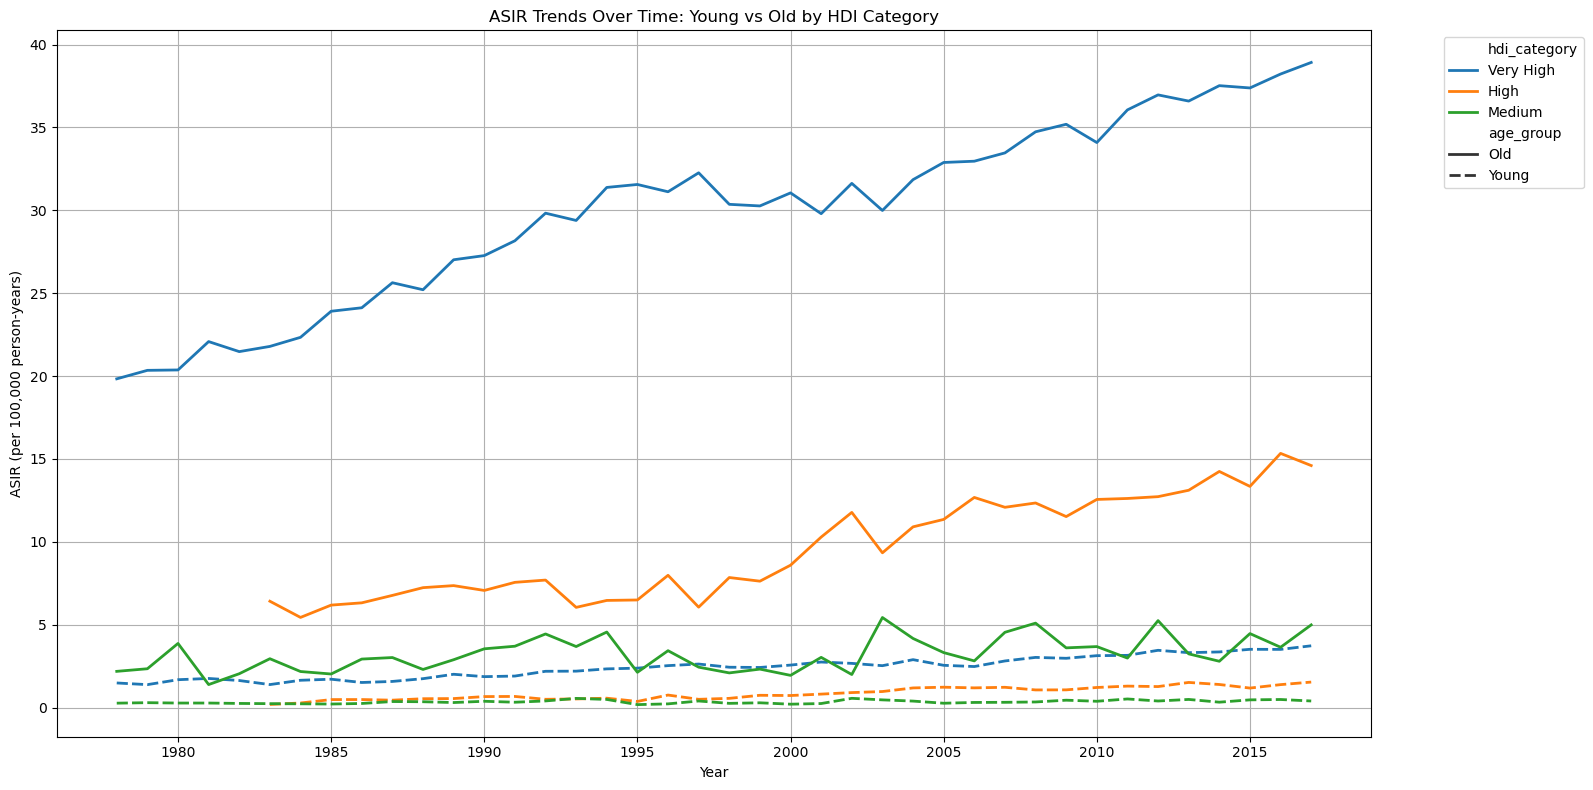

In [ ]:

plt.figure(figsize=(16, 8))
sns.lineplot(
    data=country_aggregated_df2,
    x='year',
    y='ASIR',
    hue='hdi_category',
    style='age_group',
    estimator='mean',
    errorbar=None,
    lw=2
)
plt.title('ASIR Trends Over Time: Young vs Old by HDI Category')
plt.xlabel('Year')
plt.ylabel('ASIR (per 100,000 person-years)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()